# DSCI 314/614: Final Project 
**Ryan Johnson and Andy Halsey**

You are a data scientist in healthcare. Your manager gives you two Coronavirus tweets datasets. 
The training dataset contains in the file: Corona_NLP_train.csv 
The test dataset contains in the file: Corona_NLP_test.csv.

Both have the following columns:
* UserName
* ScreenName
* Location
* TweetAt
* OriginalTweet
* Sentiment

## Setting Up Environment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import spacy

# importing library pdfReader
from PyPDF2 import PdfReader

# importing spacy library
import spacy
from spacy import displacy

from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

from time import time
from pprint import pprint



#########################################################
import warnings
warnings.filterwarnings('ignore') # ignore warnings
#########################################################

# sklearn
from sklearn.base import BaseEstimator
from sklearn.linear_model import SGDClassifier

# support vector machines
from sklearn.svm import SVC
# random forest
from sklearn.ensemble import RandomForestClassifier

from sklearn.base import TransformerMixin
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  #convert texts to numerical arrarys/values
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report




### Steps and Questions

#### 1- Concatenate the following three columns into a new column of Tweet_texts:
* Location
* TweetAt
* OriginalTweet

In [2]:
# train dataset
corona_train = pd.read_csv('Corona_NLP_train.csv', encoding = "ISO-8859-1")

# create new column of Tweet_texts for train data

# three columns used to create new column
trainCols = ['Location', 'TweetAt', 'OriginalTweet']

# concatenating columns into new column. Using lamdda to join each row and adding a space to make sure they don't overlap
# In order to make Regex work need to convert DataFrames of train and test to strings
# converts all rows to object (str) for the new column
corona_train['Tweet_texts_train'] = corona_train[trainCols].apply(lambda r: " ".join(r.values.astype(str)), axis=1) 


# corona_train.head()

In [3]:
# test dataset
corona_test = pd.read_csv('Corona_NLP_test.csv', encoding = "ISO-8859-1")

# three columns used to create new column
testCols = ['Location', 'TweetAt', 'OriginalTweet']

# concatenating columns into new column. Using lamdda to join each row and adding a space to make sure they don't overlap
# In order to make Regex work need to convert DataFrames of train and test to strings
# converts all rows to object (str) for the new column
corona_test['Tweet_texts_test'] = corona_test[testCols].apply(lambda r: " ".join(r.values.astype(str)), axis=1) 

# corona_test.head()

#### 2- Clean and preprocess the new column of Tweet_texts:
* 2.1 Remove all special characters, punctuation using a regular expression.
* 2.2 Remove the date and time in the tweets using a regular expression.
* 2.3 Remove the hyperlink URL in the tweets using a regular expression.
* 2.4 Remove the Twitter hashtags(# before a relevant keyword or phrase ) in the tweets using a regular expression.
* 2.5 Remove the usernames (also known as the handle –– begins with the “@” symbol) using a regular expression.
* 2.6 Remove all words containing at most two characters such as "a", "an", "in", "on", etc.
* 2.7 Remove all rows without any text left (empty text) in the column of Tweet_texts.
* 2.8 Perform the part of speech tagging for the texts.
* 2.9 Visualize the dependency parser.
* 2.10 Perform the named entities recognition for the texts.
* 2.11 Visualize the GEOLOCATION, MONEY, and QUANTITY in the texts.

**Note:**
I put 2.1 after 2.7 in order for the Regex expressions to work correctly.

In [4]:
# for both csv files train and test

# Note:
# removing '_' and nan for right now. If I remove all special characters and punctuation it messes with the Regex formulas seen below
# In order to remove the  usernames correctly (@Phil_Gahan) and nan because needed

# moving 2.1 to after 2.7

# train
corona_train['Tweet_texts_train'] = corona_train['Tweet_texts_train'].apply(lambda x: re.sub(r'(nan)|_','',x))

# test
corona_test['Tweet_texts_test'] = corona_test['Tweet_texts_test'].apply(lambda x: re.sub(r'(nan)|_','',x))
#-------------------------------------------------------------------------------------------------------------------------------------


#-------------------------------------------------------------------------------------------------------------------------------------
# 2.2 Remove the date and time in the tweets using a regular expression.

# train
corona_train['Tweet_texts_train'] = corona_train['Tweet_texts_train'].apply(lambda x: re.sub(r'\d{2}-\d{2}-\d{4}', '', x))
 
corona_train['Tweet_texts_train'] = corona_train['Tweet_texts_train'].apply(lambda x: re.sub(r'\d{2}\s\d{2}\s\d{4}', '', x))
# remove months from train
corona_train['Tweet_texts_train'] = corona_train['Tweet_texts_train'].apply(lambda x: re.sub(r'(january|february|march|april|may|june|july|august|september|october|november|december)', '', x))

# remove months in abbreviation from train and remaining data and times
corona_train['Tweet_texts_train'] = corona_train['Tweet_texts_train'].apply(lambda x: re.sub(r'((Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{1,2},\s\d{4})', '', x))


# test
corona_test['Tweet_texts_test'] = corona_test['Tweet_texts_test'].apply(lambda x: re.sub(r'\d{2}-\d{2}-\d{4}', '', x))

corona_test['Tweet_texts_test'] = corona_test['Tweet_texts_test'].apply(lambda x: re.sub(r'\d{2}\s\d{2}\s\d{4}', '', x))
# remove months from test
corona_test['Tweet_texts_test'] = corona_test['Tweet_texts_test'].apply(lambda x: re.sub(r'(january|february|march|april|may|june|july|august|september|october|november|december)', '', x))

# remove months in abbreviation from test and remaining data and times
corona_test['Tweet_texts_test'] = corona_test['Tweet_texts_test'].apply(lambda x: re.sub(r'((Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{1,2},\s\d{4})', '', x)) 
#-------------------------------------------------------------------------------------------------------------------------------------


#-------------------------------------------------------------------------------------------------------------------------------------
# 2.3 Remove the hyperlink URL in the tweets using a regular expression.

# train
corona_train['Tweet_texts_train'] = corona_train['Tweet_texts_train'].apply(lambda x: re.sub(r'https?://.*', '', x)) # https:// removed
corona_train['Tweet_texts_train'] = corona_train['Tweet_texts_train'].apply(lambda x: re.sub(r'https', '', x))


# test
corona_test['Tweet_texts_test'] = corona_test['Tweet_texts_test'].apply(lambda x: re.sub(r'https?://.*', '', x))
corona_test['Tweet_texts_test'] = corona_test['Tweet_texts_test'].apply(lambda x: re.sub(r'https', '', x))
#-------------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------------
# 2.4 Remove the Twitter hashtags(# before a relevant keyword or phrase ) in the tweets using a regular expression.

# train
corona_train['Tweet_texts_train'] = corona_train['Tweet_texts_train'].apply(lambda x: re.sub(r'(#[A-Za-z0-9]+)', '', x))

# test
corona_test['Tweet_texts_test'] = corona_test['Tweet_texts_test'].apply(lambda x: re.sub(r'(#[A-Za-z0-9]+)', '', x))
#-------------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------------
# 2.5 Remove the usernames (also known as the handle –– begins with the “@” symbol) using a regular expression.

# train
corona_train['Tweet_texts_train'] = corona_train['Tweet_texts_train'].apply(lambda x: re.sub(r'(@[A-Za-z0-9]+)', '', x))

# test
corona_test['Tweet_texts_test'] = corona_test['Tweet_texts_test'].apply(lambda x: re.sub(r'(@[A-Za-z0-9]+)', '', x))
#-------------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------------
# 2.6 Remove all words containing at most two characters such as "a", "an", "in", "on", etc.

# train
corona_train['Tweet_texts_train'] = corona_train['Tweet_texts_train'].apply(lambda x: re.sub(r'\b[a-zA-Z]{1,2}\b', '', x))

# test
corona_test['Tweet_texts_test'] = corona_test['Tweet_texts_test'].apply(lambda x: re.sub(r'\b[a-zA-Z]{1,2}\b', '', x))
#-------------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------------
# 2.7 Remove all rows without any text left (empty text) in the column of Tweet_texts.

# train
corona_train['Tweet_texts_train'] = corona_train['Tweet_texts_train'].dropna() # removed empty rows

# test
corona_test['Tweet_texts_test'] = corona_test['Tweet_texts_test'].dropna()


#corona_train['Tweet_texts_train'].isnull().sum(axis=0) 
#-------------------------------------------------------------------------------------------------------------------------------------



In [5]:
# Now doing 2.1
# 2.1 Remove all special characters, punctuation using a regular expression, 
# except '$' it messes with the algorithm used to find the NER label 'MONEY'

# orignal
# train
# corona_train['Tweet_texts_train'] = corona_train['Tweet_texts_train'].apply(lambda x: re.sub(r'([^A-Za-z0-9]+)',' ',x))
# test
# corona_test['Tweet_texts_test'] = corona_test['Tweet_texts_test'].apply(lambda x: re.sub(r'([^A-Za-z0-9]+)',' ',x))


# '$' can't be removed becuase it messes with the algorithm used to find the NER label 'MONEY'

# train
corona_train['Tweet_texts_train'] = corona_train['Tweet_texts_train'].apply(lambda x: re.sub(r'([^A-Za-z0-9\$])',' ',x))

# test
corona_test['Tweet_texts_test'] = corona_test['Tweet_texts_test'].apply(lambda x: re.sub(r'([^A-Za-z0-9\$])',' ',x))

In [6]:
# convert Tweet_texts_train and Tweet_texts_test into strings

# train
corona_Tweet_texts_train = str(corona_train['Tweet_texts_train'])

# test
corona_Tweet_texts_test = str(corona_test['Tweet_texts_test'])

# -------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------

# 2.8 Perform the part of speech tagging for the texts.

print('corona_Tweet_texts_train for the speech tagging')
print('##' * 25)
print()

# train
# model from Spacy
nlp1 = spacy.load("en_core_web_sm")

# putting all text into string for corona train dataset for Tweet_texts_train
docTrain = nlp1(corona_Tweet_texts_train)

# showing results of the first 15 tokens
for t in docTrain[:15]:
    print(t.text, t.lemma_, t.pos_, t.tag_, t.dep_, t.shape_, t.is_alpha, t.is_stop)

# ----------------------------------------------------------------------------------------
print()
print('##' * 25)
print('##' * 25)
print()
# ----------------------------------------------------------------------------------------

print('corona_Tweet_texts_test for the speech tagging')
print('##' * 25)
print()

# test
# model from Spacy
nlp2 = spacy.load("en_core_web_sm")

# putting all text into string for corona test dataset for Tweet_texts_test
docTest = nlp2(corona_Tweet_texts_test)

# showing results of the first 15 tokens
for t in docTest[:15]:
    print(t.text, t.lemma_, t.pos_, t.tag_, t.dep_, t.shape_, t.is_alpha, t.is_stop)

corona_Tweet_texts_train for the speech tagging
##################################################

0 0 PUNCT NFP ROOT d False False
                                                                                            SPACE _SP dep      False False
London London PROPN NNP nsubj Xxxxx True False
    
     
 SPACE _SP dep     
 False False
1 1 NUM CD nummod d False False
                    SPACE _SP dep      False False
advice advice NOUN NN compound xxxx True False
Talk talk NOUN NN nmod Xxxx True False
    SPACE _SP dep   False False
your your PRON PRP$ poss xxxx True True
neighbours neighbours PROPN NNP appos xxxx True False
family family NOUN NN appos xxxx True False
    SPACE _SP dep   False False
exchang exchang PROPN NNP appos xxxx True False
... ... PUNCT : punct ... False False

##################################################
##################################################

corona_Tweet_texts_test for the speech tagging
#############################################

In [7]:
# 2.9 Visualize the dependency parser. for train and test Tweet_texts
# visualizing text
#----------------------------------------------------------------------------
#----------------------------------------------------------------------------
# train
print('corona_Tweet_texts_train for the visualize of the dependency parser')

# process all rows of the column
nlp3 = spacy.load("en_core_web_sm")


doc3train = nlp3(corona_Tweet_texts_train) # all text for corona_train dataset column Tweet_texts_train

# seeing visual for all texts
displacy.render(doc3train, style="dep", jupyter=True)

#----------------------------------------------------------------------------
print()
print()
#----------------------------------------------------------------------------

# test
print('corona_Tweet_texts_test for the visualize of the dependency parser')

# process all rows of the column
nlp4 = spacy.load("en_core_web_sm")


doc4test = nlp4(corona_Tweet_texts_test) # all text for corona_test dataset column Tweet_texts_test

# seeing visual for all texts
displacy.render(doc4test, style="dep", jupyter=True)

corona_Tweet_texts_train for the visualize of the dependency parser




corona_Tweet_texts_test for the visualize of the dependency parser


In [8]:
# 2.10 Perform the named entities recognition for the texts.  for train and test Tweet_texts

# train
print('corona_Tweet_texts_train for the named entities recognition')
print('###' * 25)
# model
nlp5 = spacy.load("en_core_web_sm")

doc5train = nlp5(corona_Tweet_texts_train) # for all texts

# loop the entittes/ tokens using doc.ents
for e in doc5train.ents:
    # text in doc
    
    # location of NER start_char and end_char
    print(e.text, e.start_char, e.end_char, e.label_)


#-------------------------------------------------------------------------
print()
print('###' * 25)
print('###' * 25)
print()
print()
#-------------------------------------------------------------------------

# test
print('corona_Tweet_texts_test for the named entities recognition')
print('###' * 25)

# model
nlp6 = spacy.load("en_core_web_sm")

doc6test = nlp6(corona_Tweet_texts_test) # for all texts

# loop the entittes/ tokens using doc.ents
for e in doc6test.ents:
    # text in doc
    
    # location of NER start_char and end_char
    print(e.text, e.start_char, e.end_char, e.label_)

corona_Tweet_texts_train for the named entities recognition
###########################################################################
0 0 1 CARDINAL
1 59 60 CARDINAL
Coronavirus Australia 138 159 GPE
Woolworths 161 171 NORP
3 177 178 CARDINAL
4             236 249 QUANTITY
41152 354 359 DATE
Wellington City 363 378 GPE
New Zealand 380 391 GPE
Airline 393 400 GPE
41153       413 424 QUANTITY
Response 424 432 ORG
COVI 464 468 ORG
41155 531 536 CARDINAL
41156 590 595 DATE
Rift 639 643 PERSON
Length 674 680 PERSON
41157 682 687 DATE

###########################################################################
###########################################################################


corona_Tweet_texts_test for the named entities recognition
###########################################################################
0 0 1 CARDINAL
New Yorkers 23 34 NORP
3       Chicagoland 174 193 CARDINAL
4 232 233 CARDINAL
Melbourne 240 249 GPE
One week 276 284 DATE
Israel 392 398 GPE
3794 406 410 DAT

In [9]:
pd.set_option('display.max_colwidth', 3000)

# 2.11 Visualize the GEOLOCATION, MONEY, and QUANTITY in the texts. for train and test Tweet_texts
#                       (GPE)

# train
nlp7 = spacy.load("en_core_web_sm")
doc7train = nlp7(corona_Tweet_texts_train)

# displacy.render(doc7train, style="ent", jupyter = True) # seeing all NER labels

# looking for GPE (GEOLOCATION), MONEY and QUANTITY

optionsTrainGMQ = {"ents": ['GPE', 'MONEY', 'QUANTITY'], "colors": {'GPE': '#FEAB23', 'MONEY':'#2ECC71', 'QUANTITY':'#CCCCFF'}}


# Visualizing by setting "ent" and jupyter to True with options for GEOLOCATION, MONEY, and QUANTITY
displacy.render(doc7train, style="ent", jupyter = True, options=optionsTrainGMQ)   

# test

In [10]:
# corona_train.head()

In [11]:
# pd.set_option('display.max_colwidth', 3000)
# corona_train

In [12]:
# corona_test.head()

#### 3- Extract all the tokens from the Tweet_texts.

In [13]:
# Extract all the tokens from corona_Tweet_texts_train  # str and corona_Tweet_texts_test  # str 

# train
corona_Tweet_texts_train = str(corona_train['Tweet_texts_train'])

# test
corona_Tweet_texts_test = str(corona_test['Tweet_texts_test'])

objectDoc = spacy.load("en_core_web_sm")

# train
newDoctrain = objectDoc(corona_Tweet_texts_train)

print("corona_Tweet_texts_train")
print('--'*57)
# printing first 25 tokens
for t in newDoctrain[:25]:
    print(f'Token text = {t.text}; Is the token lowercase? {t.is_lower}; Does the token consist of digits? {t.is_digit} ')

print('--'*57)
print('--'*57)
print('--'*57)
print('--'*57)

# test
newDoctest = objectDoc(corona_Tweet_texts_test)

print("corona_Tweet_texts_test")
print('--'*57)
# printing first 25 tokens
for t in newDoctest[:25]:
    print(f'Token text = {t.text}; Is the token lowercase? {t.is_lower}; Does the token consist of digits? {t.is_digit} ')


corona_Tweet_texts_train
------------------------------------------------------------------------------------------------------------------
Token text = 0; Is the token lowercase? False; Does the token consist of digits? True 
Token text =                                                                                                                                                                                                                                                         ; Is the token lowercase? False; Does the token consist of digits? False 
Token text = London; Is the token lowercase? False; Does the token consist of digits? False 
Token text =     
; Is the token lowercase? False; Does the token consist of digits? False 
Token text = 1; Is the token lowercase? False; Does the token consist of digits? True 
Token text =                                     ; Is the token lowercase? False; Does the token consist of digits? False 
Token text = advice; Is the token lowercase

#### 4- Replace the Tweet_texts column with the string only containing the lemmas of all the tokens.

In [14]:
# Reference code - modify
# 2 Lemmas

#for token in document[:50]:
 #   print(f'Token text = {token.text}; Lemma = {token.lemma_} ') # Find lemmas in the document



# Extract all lemmas from the texts.

# Lemmatization usually refers to doing things properly with the use of a vocabulary 
#   and morphological analysis of words, normally aiming to remove inflectional endings only
#  and to return the base or dictionary form of a word, which is known as the lemma .

# train

lemDoc = spacy.load("en_core_web_sm")

newLemDocTrain = lemDoc(corona_Tweet_texts_train)

print("lemmas train")
print('--'*57)
#print first 25 tokens and lemmas
for l in newLemDocTrain[:25]:
    print(f'Token text = {l.text}; The lemma = {l.lemma_} ')

print('--'*57)
print('--'*57)


# test 
print("lemmas test")
print('--'*57)

newLemDocTest = lemDoc(corona_Tweet_texts_test)

#print first 25 tokens and lemmas
for l in newLemDocTest[:25]:
    print(f'Token text = {l.text}; The lemma = {l.lemma_} ')

lemmas train
------------------------------------------------------------------------------------------------------------------
Token text = 0; The lemma = 0 
Token text =                                                                                                                                                                                                                                                         ; The lemma =                                                                                                                                                                                                                                                          
Token text = London; The lemma = London 
Token text =     
; The lemma =     
 
Token text = 1; The lemma = 1 
Token text =                                     ; The lemma =                                      
Token text = advice; The lemma = advice 
Token text = Talk; The lemma = talk 
Token text =  ; The lemma 

#### 5- Graphically summarize the Sentiment.

In [15]:
# corona_train
corona_train['Sentiment'].value_counts(normalize= True)

Sentiment
Positive              0.277523
Negative              0.240955
Neutral               0.187404
Extremely Positive    0.160945
Extremely Negative    0.133173
Name: proportion, dtype: float64

Text(0.5, 1.0, 'corona_train Sentiment')

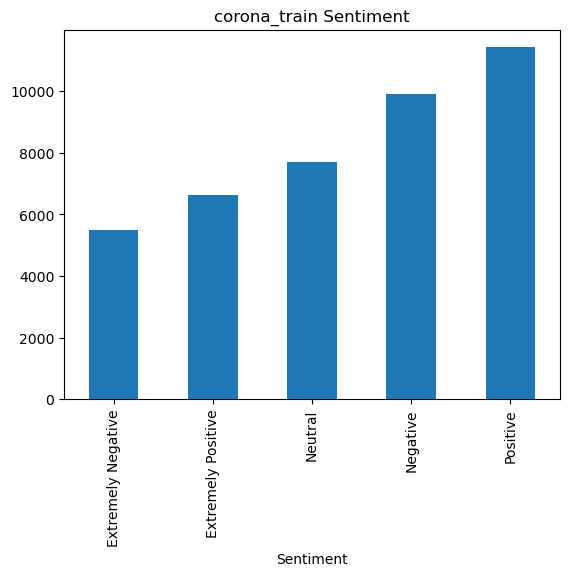

In [16]:
# corona_train
corona_train.Sentiment.value_counts().sort_values().plot(kind = 'bar')
plt.title('corona_train Sentiment')

In [17]:
# corona_test
corona_test['Sentiment'].value_counts(normalize= True)

Sentiment
Negative              0.274092
Positive              0.249342
Neutral               0.162981
Extremely Positive    0.157715
Extremely Negative    0.155872
Name: proportion, dtype: float64

Text(0.5, 1.0, 'corona_test Sentiment')

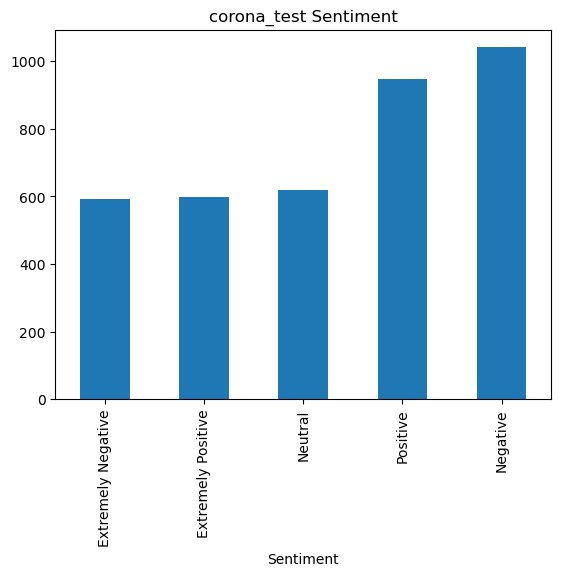

In [18]:
# corona_test
corona_test.Sentiment.value_counts().sort_values().plot(kind = 'bar')
plt.title('corona_test Sentiment')


In [19]:
# convert corona_train['Sentiment'] to string

sentimentTrain = str(corona_train['Sentiment'])


# convert corona_test['Sentiment'] to string

sentimentTest = str(corona_test['Sentiment'])


# corona_train['Sentiment']

print('corona_train Sentiment')
print('--'*57)

nlp1 = spacy.load("en_core_web_sm")

docTrain1 = nlp1(sentimentTrain) 

displacy.render(docTrain1, style="dep", jupyter=True)

print('--'*57)
print('--'*57)

# corona_test['Sentiment']

print('corona_test Sentiment')
print('--'*57)

nlp2 = spacy.load("en_core_web_sm")

docTest1 = nlp2(sentimentTest) 

displacy.render(docTest1, style="dep", jupyter=True)


corona_train Sentiment
------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
corona_test Sentiment
------------------------------------------------------------------------------------------------------------------


#### 6- Graphically summarize the length of the text of the Tweet_texts using.
* boxplot
* histogram
* density plot

length of text of Tweet_texts train and test

In [20]:
# uncleaned Tweet_text_train and Tweet_text_test for 6 and 7

corona_train['unclean_Tweet_texts_train'] = corona_train[trainCols].apply(lambda r: " ".join(r.values.astype(str)), axis=1) 

corona_test['unclean_Tweet_texts_test'] = corona_test[testCols].apply(lambda r: " ".join(r.values.astype(str)), axis=1) 

In [21]:
# train
corona_train['clean_len_tweet_texts_train'] = corona_train['Tweet_texts_train'].str.len()
corona_train['unclean_len_tweet_texts_train'] = corona_train['unclean_Tweet_texts_train'].str.len()

# test
corona_test['clean_len_tweet_texts_test'] = corona_test['Tweet_texts_test'].str.len()
corona_test['unclean_len_tweet_texts_test'] = corona_test['unclean_Tweet_texts_test'].str.len() 

In [22]:
# It only shows two decimal places
pd.options.display.float_format = "{:.2f}".format

# train
# corona_train[['clean_len_tweet_texts_train', 'unclean_len_tweet_texts_train']].describe()

# test
# corona_test[['clean_len_tweet_texts_test', 'unclean_len_tweet_texts_test']].describe()

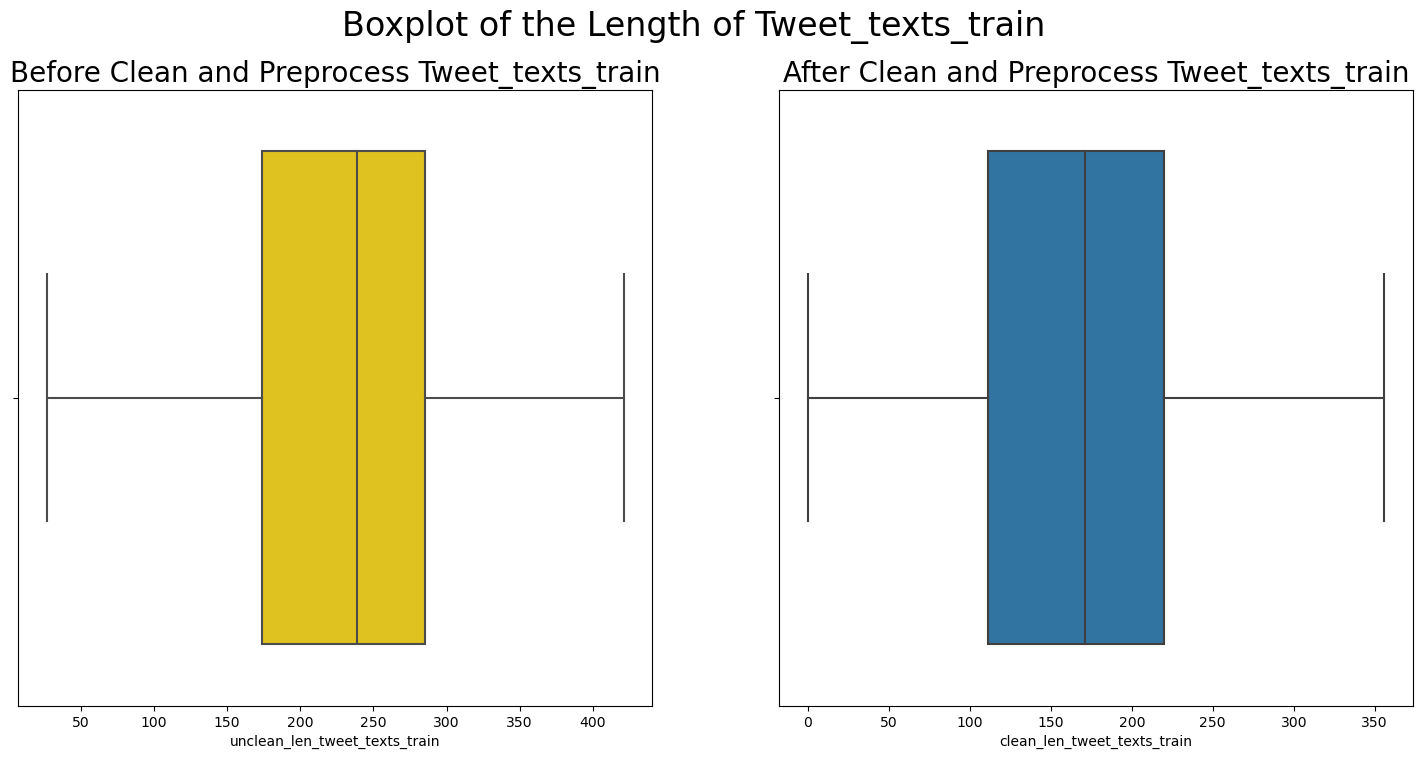

In [23]:
# boxplot length Tweet_texts_train

fig, axes = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Boxplot of the Length of Tweet_texts_train', fontsize= 24)

# Plot the texts before cleaning
sns.boxplot(ax=axes[0], x=corona_train['unclean_len_tweet_texts_train'], color='gold')
axes[0].set_title("Before Clean and Preprocess Tweet_texts_train", fontsize= 20)

# Plot the texts after cleaning
sns.boxplot(ax=axes[1], x=corona_train['clean_len_tweet_texts_train'])
x= axes[1].set_title("After Clean and Preprocess Tweet_texts_train", fontsize= 20)

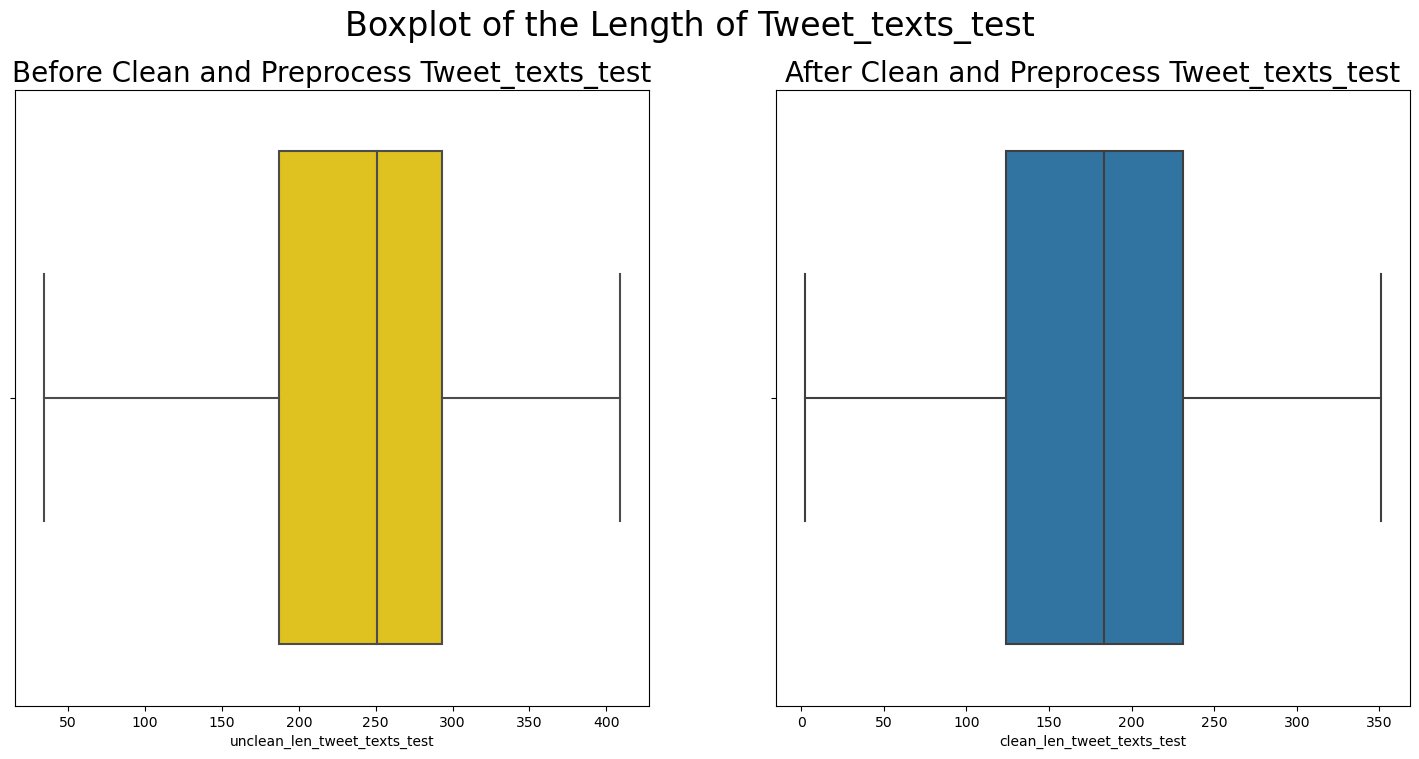

In [24]:
# boxplot length Tweet_texts_test

fig, axes = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Boxplot of the Length of Tweet_texts_test', fontsize= 24)

# Plot the texts before cleaning
sns.boxplot(ax=axes[0], x=corona_test['unclean_len_tweet_texts_test'], color='gold')
axes[0].set_title("Before Clean and Preprocess Tweet_texts_test", fontsize= 20)
# Plot the texts after cleaning
sns.boxplot(ax=axes[1], x=corona_test['clean_len_tweet_texts_test'])
x= axes[1].set_title("After Clean and Preprocess Tweet_texts_test", fontsize= 20)

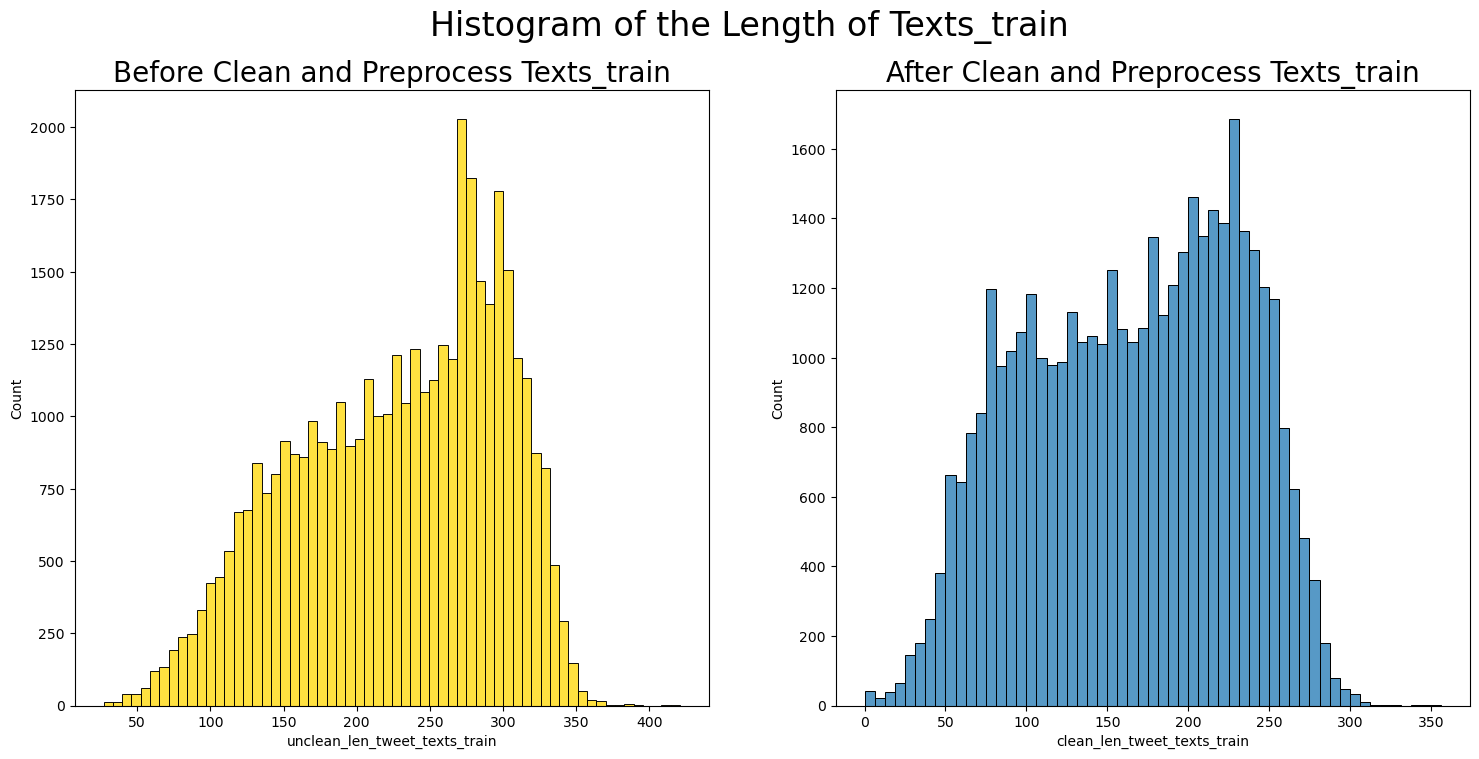

In [36]:
# histogram for length Tweet_texts_train

fig, axes = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Histogram of the Length of Texts_train', fontsize= 24)

# Plot the texts before cleaning
sns.histplot(ax=axes[0], data = corona_train, x="unclean_len_tweet_texts_train", color='gold')
axes[0].set_title("Before Clean and Preprocess Texts_train", fontsize= 20)
# Plot the texts after cleaning
sns.histplot(ax=axes[1], data = corona_train, x="clean_len_tweet_texts_train")
x= axes[1].set_title("After Clean and Preprocess Texts_train", fontsize= 20)

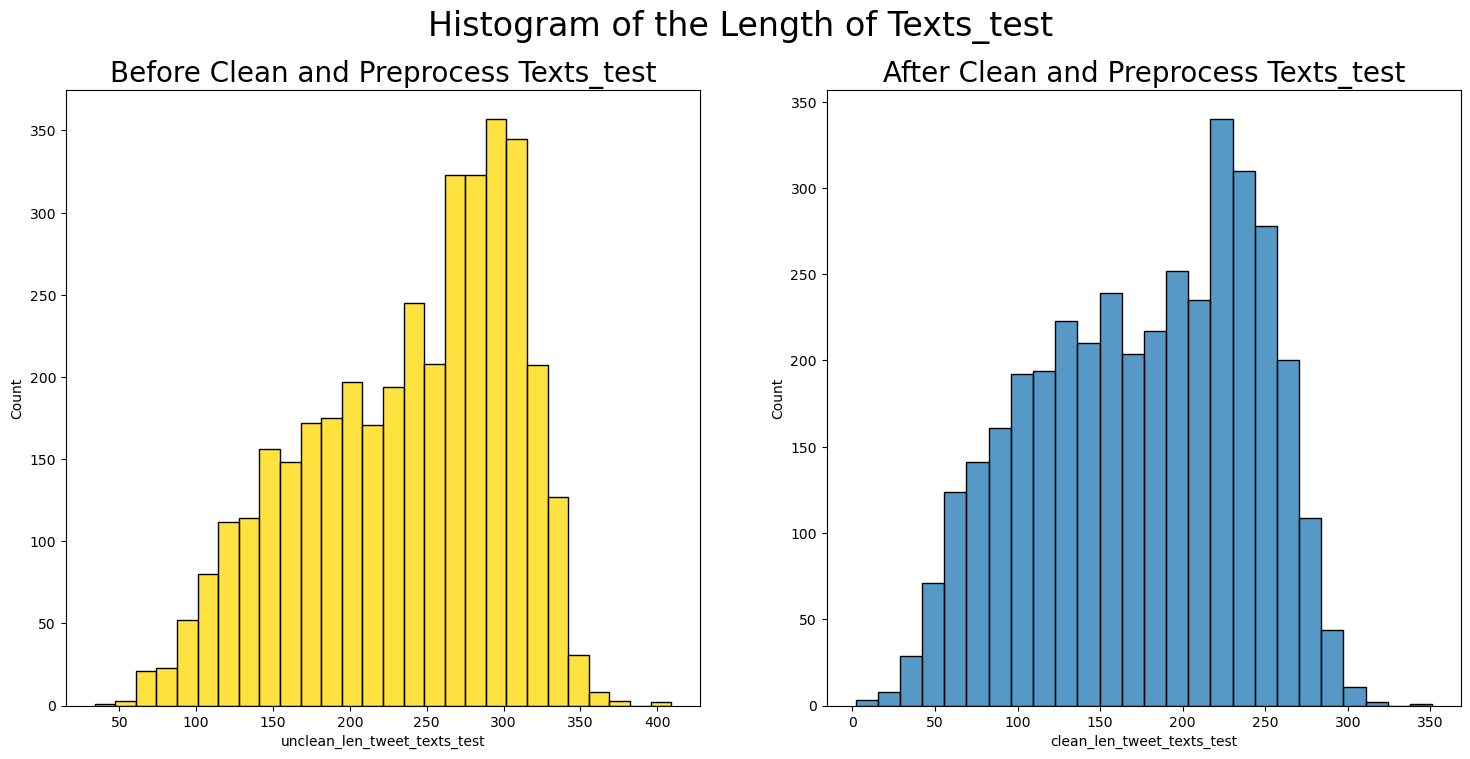

In [37]:
# histogram for length Tweet_texts_test

fig, axes = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Histogram of the Length of Texts_test', fontsize= 24)

# Plot the texts before cleaning
sns.histplot(ax=axes[0], data = corona_test, x="unclean_len_tweet_texts_test", color='gold')
axes[0].set_title("Before Clean and Preprocess Texts_test", fontsize= 20)
# Plot the texts after cleaning
sns.histplot(ax=axes[1], data = corona_test, x="clean_len_tweet_texts_test")
x= axes[1].set_title("After Clean and Preprocess Texts_test", fontsize= 20)

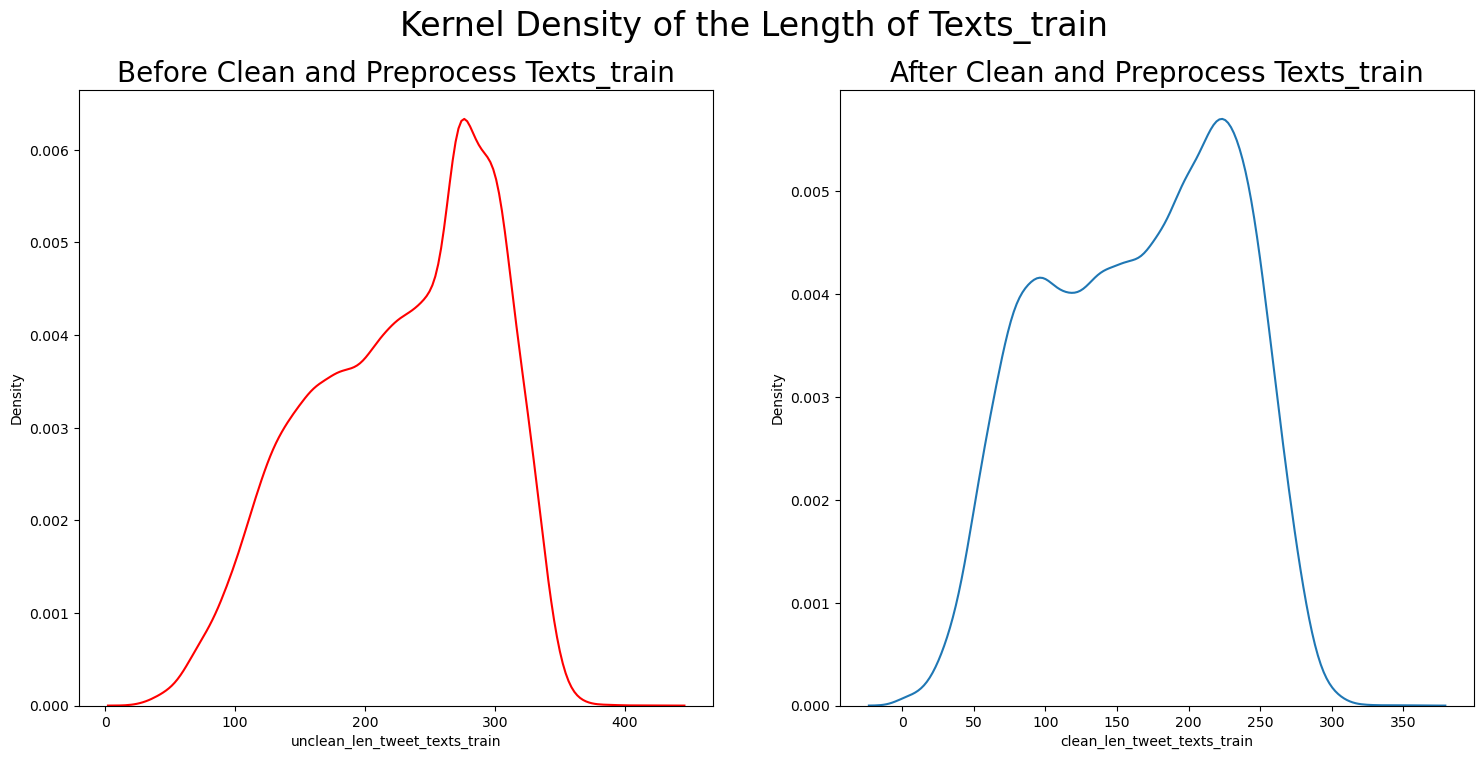

In [38]:
# density plot train

fig, axes = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Kernel Density of the Length of Texts_train', fontsize= 24)

sns.kdeplot(ax=axes[0], data = corona_train, x="unclean_len_tweet_texts_train", color='red')
axes[0].set_title("Before Clean and Preprocess Texts_train", fontsize= 20)

sns.kdeplot(ax=axes[1], data = corona_train, x="clean_len_tweet_texts_train")
x= axes[1].set_title("After Clean and Preprocess Texts_train", fontsize= 20)

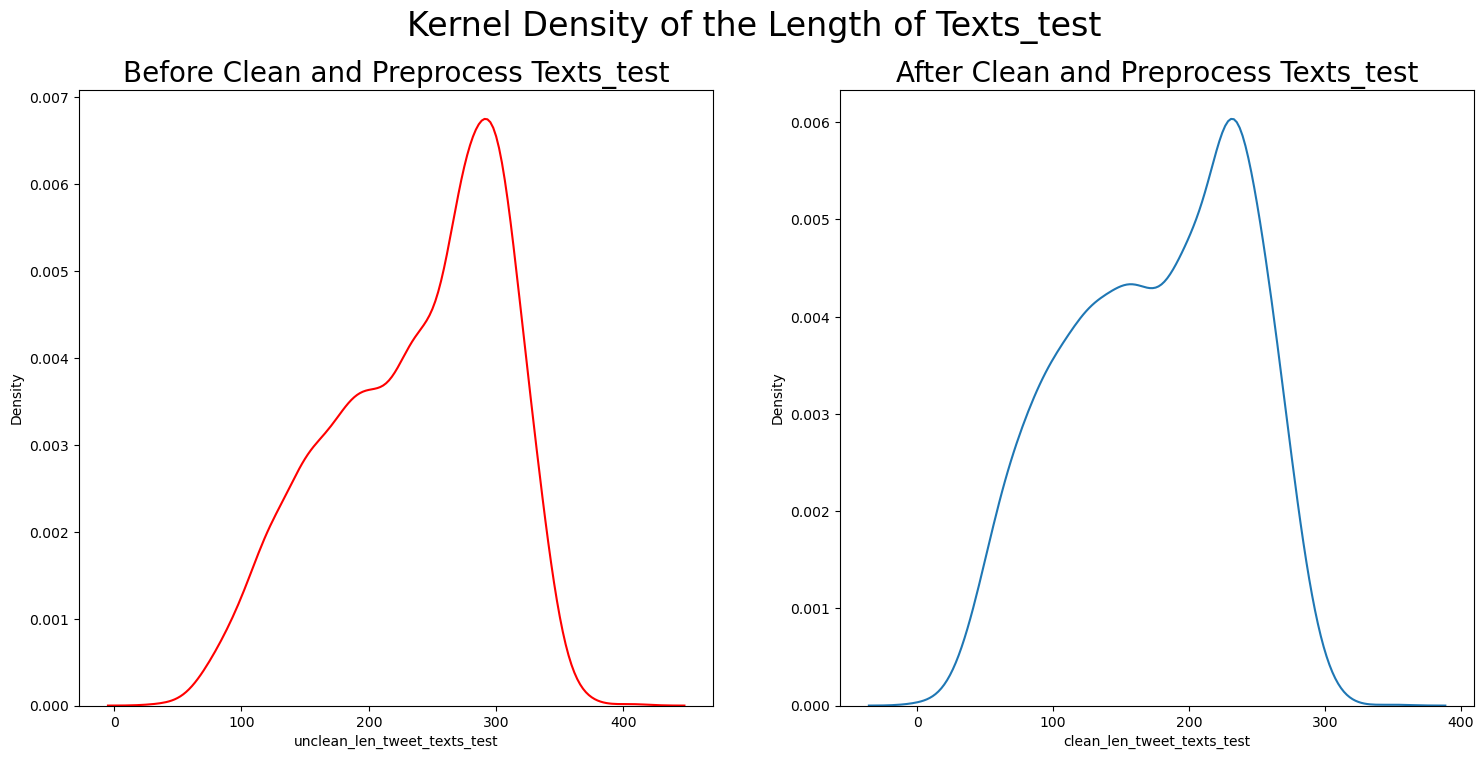

In [39]:
# density plot test

# Density Reference

fig, axes = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Kernel Density of the Length of Texts_test', fontsize= 24)

sns.kdeplot(ax=axes[0], data = corona_test, x="unclean_len_tweet_texts_test", color='red' )
axes[0].set_title("Before Clean and Preprocess Texts_test", fontsize= 20)

sns.kdeplot(ax=axes[1], data = corona_test, x="clean_len_tweet_texts_test")
x= axes[1].set_title("After Clean and Preprocess Texts_test", fontsize= 20)



#### 7- Graphically summarize the word count of the text of the Tweet_texts using
* boxplot
* histogram
* density plot

In [40]:
# train
corona_train['count_word_bc'] = corona_train['unclean_Tweet_texts_train'].str.split().str.len()
corona_train['count_word_ac'] = corona_train['Tweet_texts_train'].str.split().str.len()


# test
corona_test['count_word_bc'] = corona_test['unclean_Tweet_texts_test'].str.split().str.len()
corona_test['count_word_ac'] = corona_test['Tweet_texts_test'].str.split().str.len()

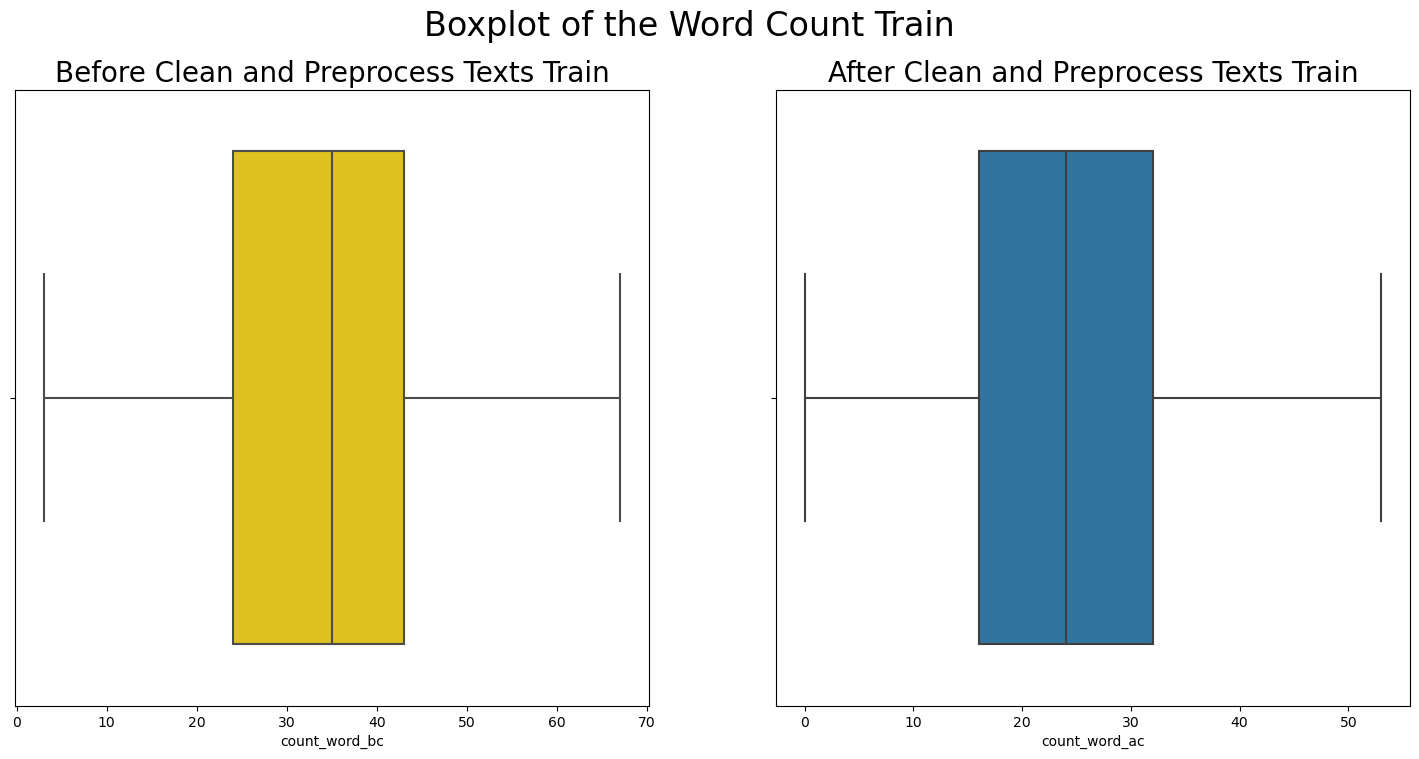

In [41]:
# boxplot train
fig, axes = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Boxplot of the Word Count Train', fontsize= 24)

sns.boxplot(ax=axes[0], x=corona_train["count_word_bc"], color='gold')
axes[0].set_title("Before Clean and Preprocess Texts Train", fontsize= 20)

sns.boxplot(ax=axes[1], x=corona_train["count_word_ac"])
x = axes[1].set_title("After Clean and Preprocess Texts Train", fontsize= 20)

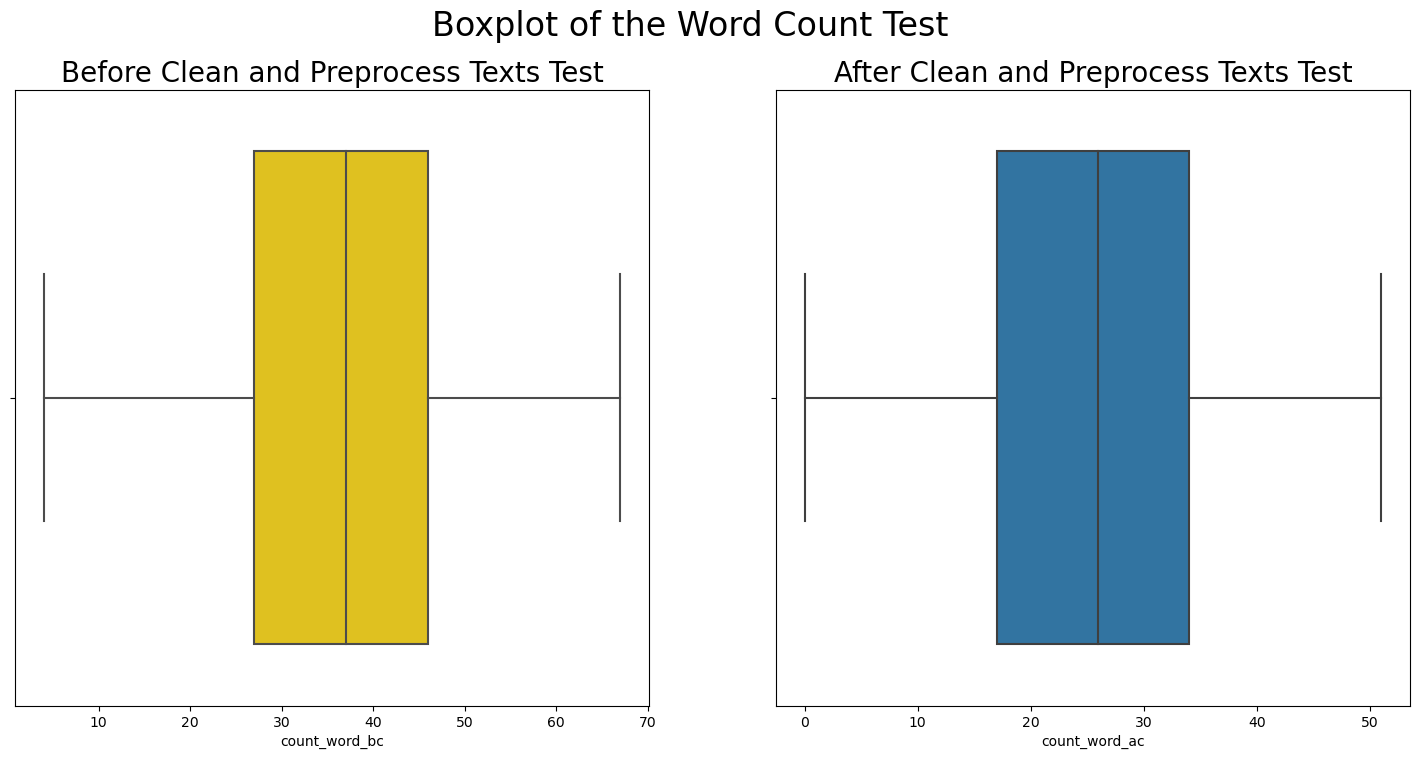

In [42]:
# boxplot test
fig, axes = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Boxplot of the Word Count Test', fontsize= 24)

sns.boxplot(ax=axes[0], x=corona_test["count_word_bc"], color='gold')
axes[0].set_title("Before Clean and Preprocess Texts Test", fontsize= 20)

sns.boxplot(ax=axes[1], x=corona_test["count_word_ac"])
x = axes[1].set_title("After Clean and Preprocess Texts Test", fontsize= 20)

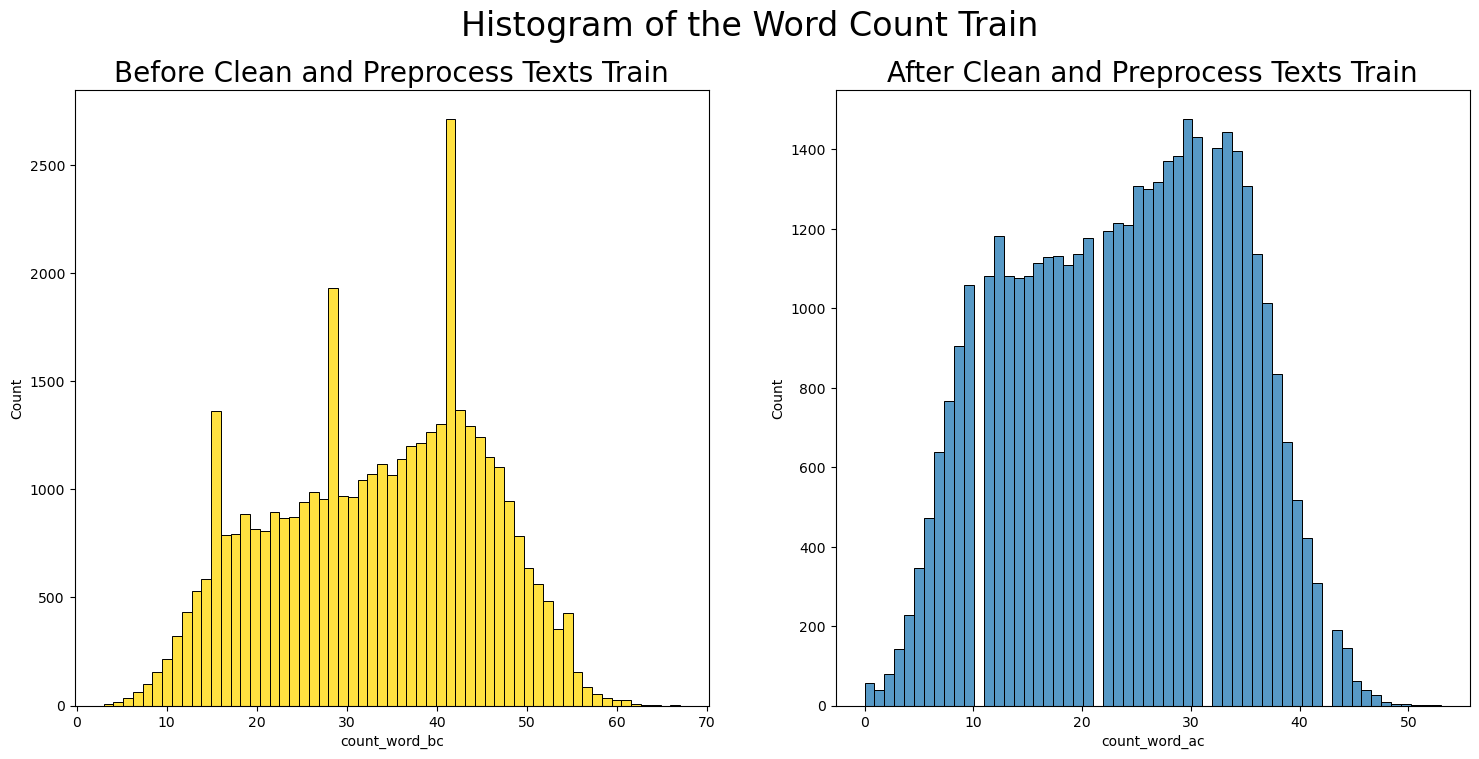

In [43]:
# histogram train
fig, axes = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Histogram of the Word Count Train', fontsize= 24)

sns.histplot(ax=axes[0], data = corona_train, x="count_word_bc", color='gold')
axes[0].set_title("Before Clean and Preprocess Texts Train", fontsize= 20)

sns.histplot(ax=axes[1], data = corona_train, x="count_word_ac")
x= axes[1].set_title("After Clean and Preprocess Texts Train", fontsize= 20)

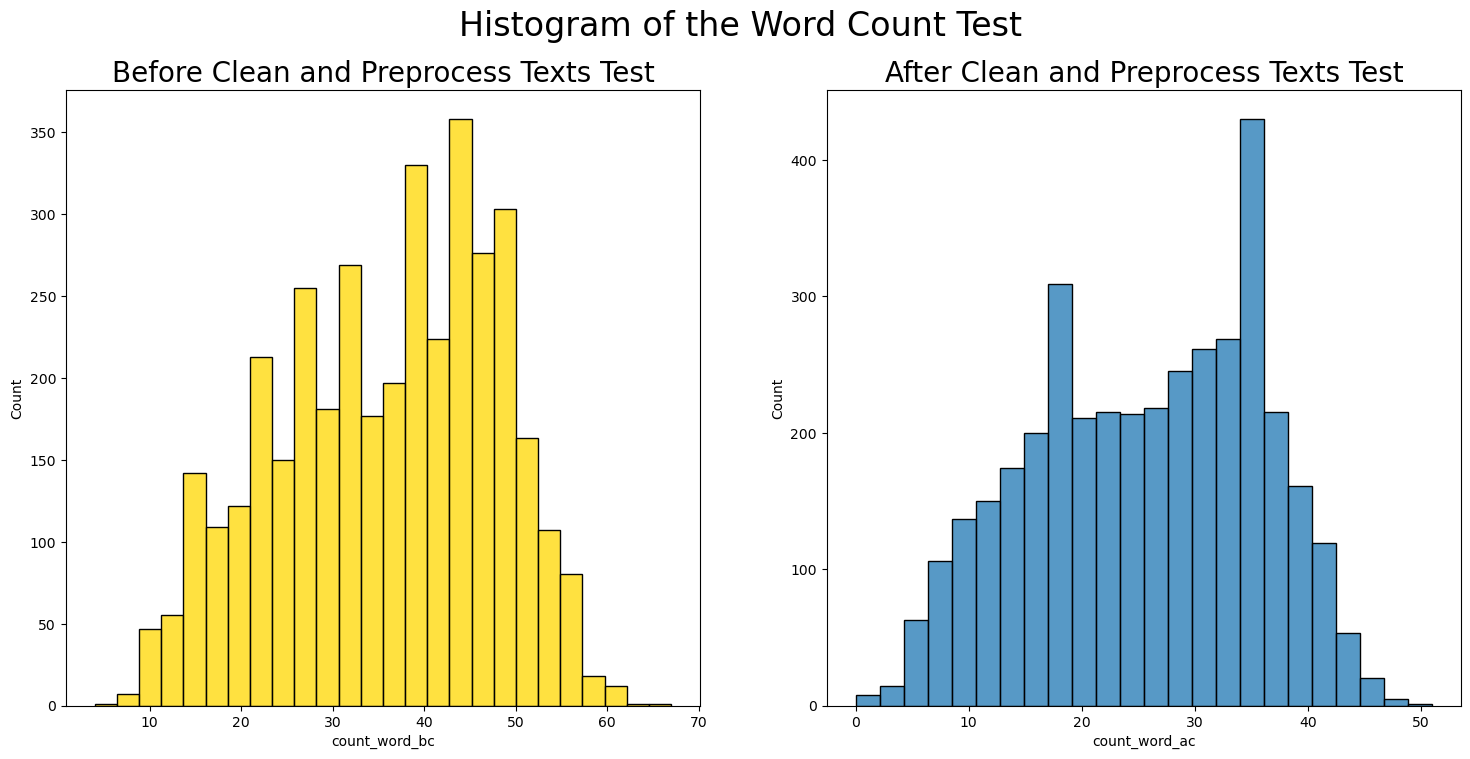

In [44]:
# histogram test
fig, axes = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Histogram of the Word Count Test', fontsize= 24)

sns.histplot(ax=axes[0], data = corona_test, x="count_word_bc", color='gold')
axes[0].set_title("Before Clean and Preprocess Texts Test", fontsize= 20)

sns.histplot(ax=axes[1], data = corona_test, x="count_word_ac")
x= axes[1].set_title("After Clean and Preprocess Texts Test", fontsize= 20)

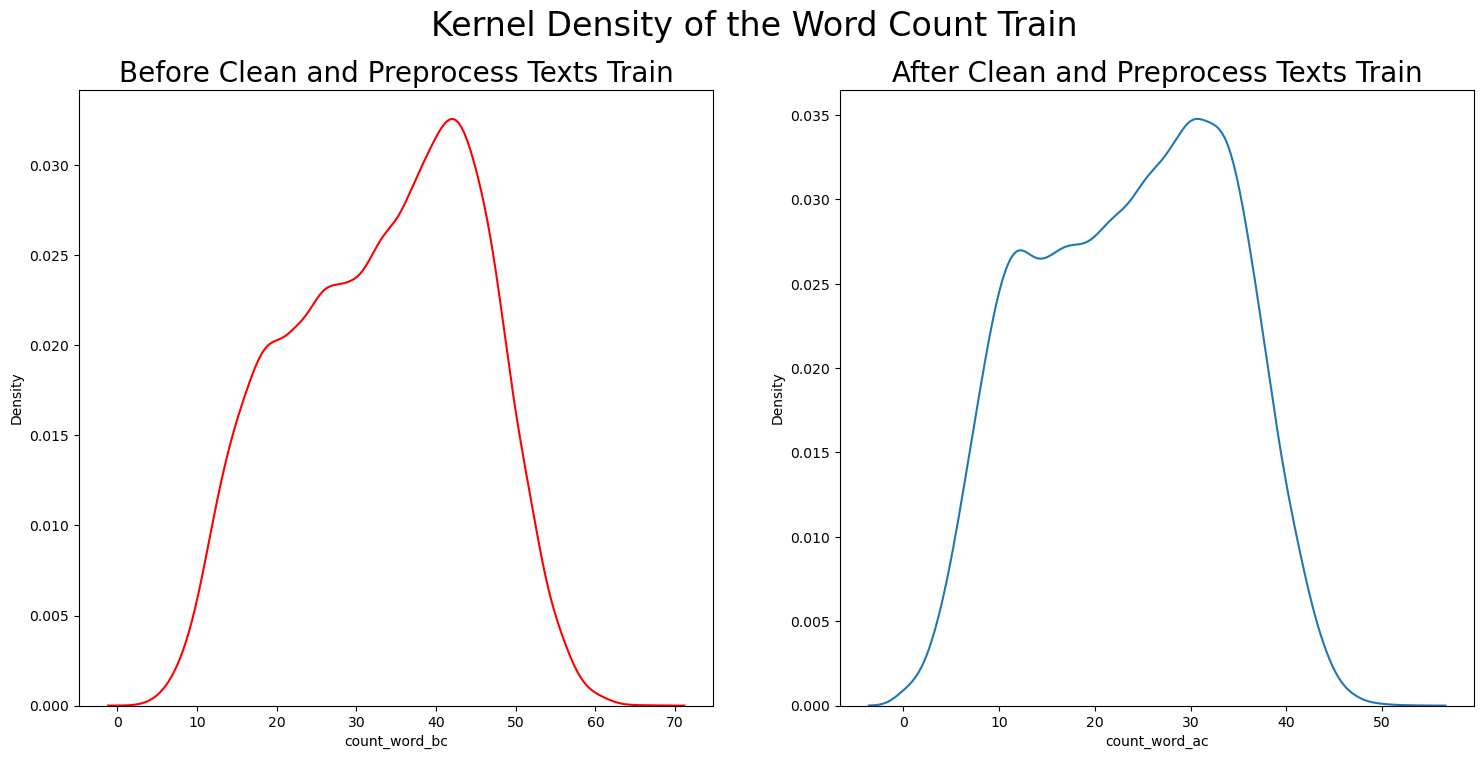

In [45]:
# density plot train
fig, axes = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Kernel Density of the Word Count Train', fontsize= 24)

sns.kdeplot(ax=axes[0], data = corona_train, x="count_word_bc", color='r')
axes[0].set_title("Before Clean and Preprocess Texts Train", fontsize= 20)

sns.kdeplot(ax=axes[1], data = corona_train, x="count_word_ac")
x= axes[1].set_title("After Clean and Preprocess Texts Train", fontsize= 20)

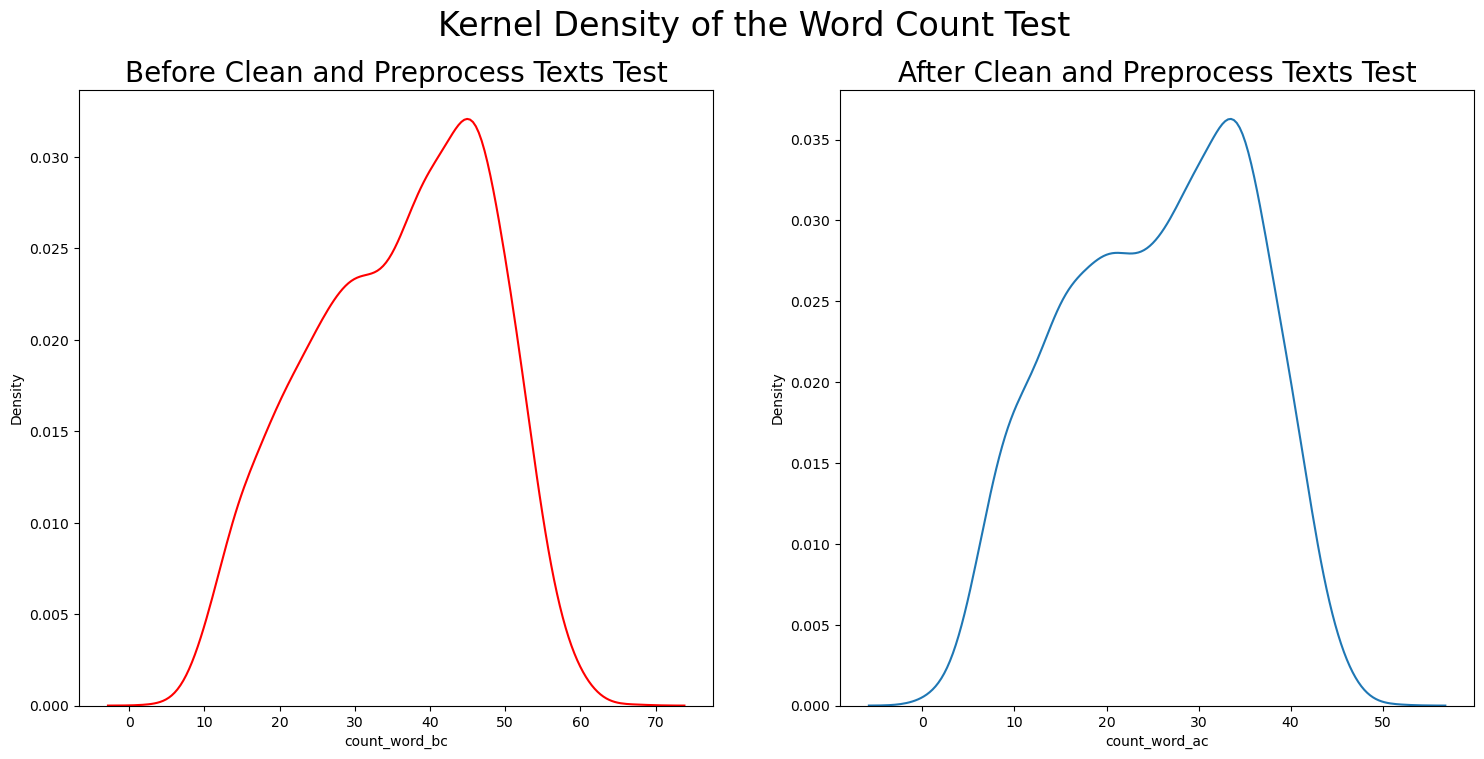

In [39]:
# density plot test
fig, axes = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Kernel Density of the Word Count Test', fontsize= 24)

sns.kdeplot(ax=axes[0], data = corona_test, x="count_word_bc", color='r')
axes[0].set_title("Before Clean and Preprocess Texts Test", fontsize= 20)

sns.kdeplot(ax=axes[1], data = corona_test, x="count_word_ac")
x= axes[1].set_title("After Clean and Preprocess Texts Test", fontsize= 20)

#### 8- Graphically summarize the top 10 unigram and bigrams of the tf-idf of the text of the Tweet_texts.

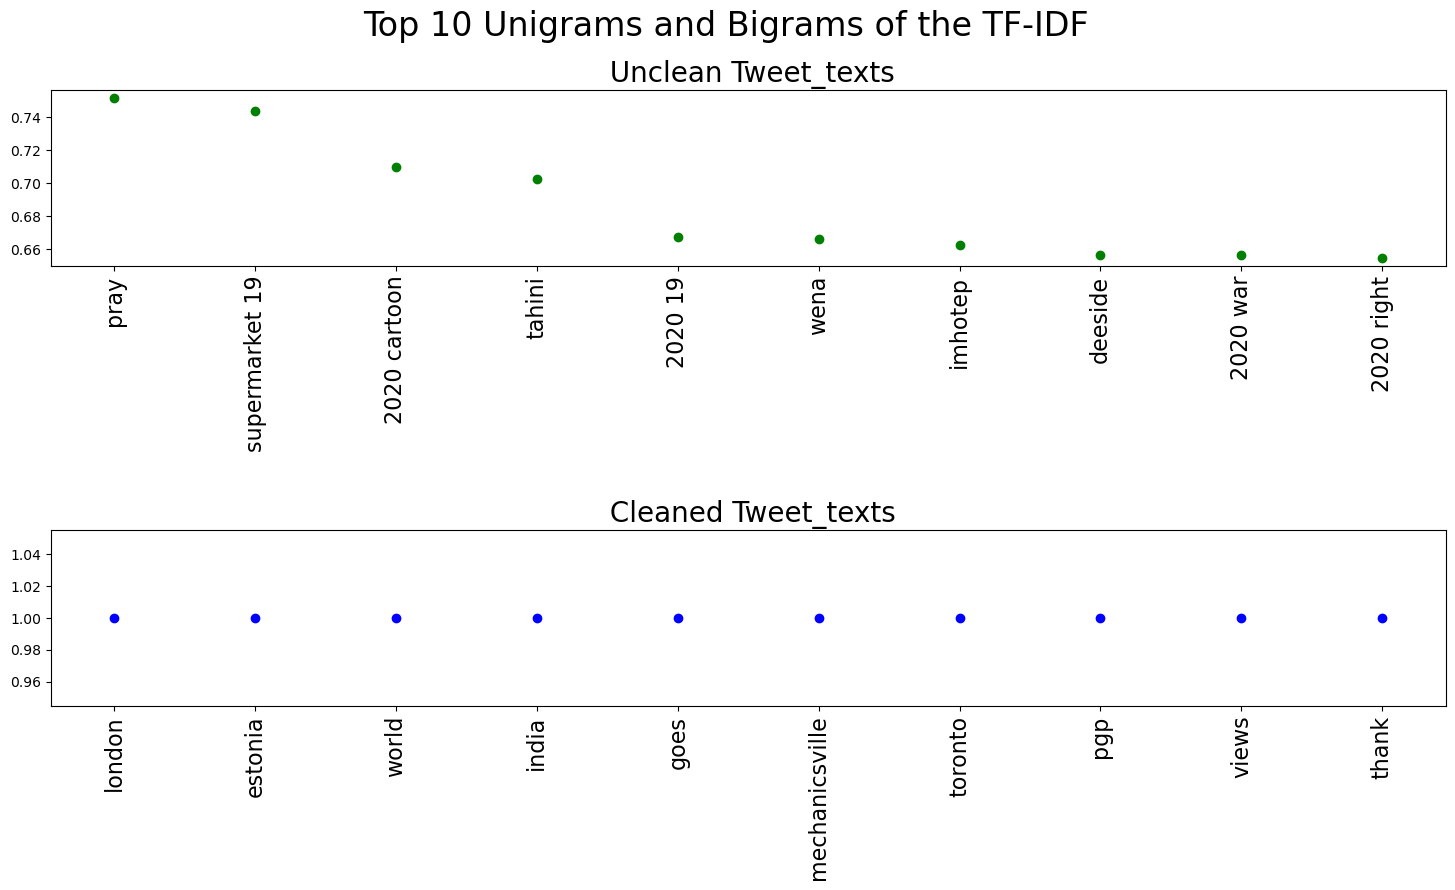

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer #convert texts to numerical arrarys/values

#            top 5 words                                                             # unigram is 1 gram and bigrams is 2 gram
def get_top_tf_idf_words(df = corona_train, col = 'Tweet_texts_train', use_idf = True, ngram_range =(1, 2), top_n= 5):  
    
    tf_idf_tweet_texts_train = TfidfVectorizer(stop_words='english', ngram_range = ngram_range, use_idf = use_idf)
   
    X_sparse_matrix = tf_idf_tweet_texts_train.fit_transform(df[col]) # fit and transform
    
    feature_names = np.array(tf_idf_tweet_texts_train.get_feature_names_out()) # changed to get_feature_names_out(). get_feature_names() doesn't exist

    tf_idf_sparse_matrix = tf_idf_tweet_texts_train.transform(df[col]) # Rank the matrix by tf-idf values and return the indices

    sorted_idx = np.argsort(tf_idf_sparse_matrix.data)[:-(top_n+1):-1]
    
    return pd.DataFrame(
    {'feature': feature_names[tf_idf_sparse_matrix.indices[sorted_idx]],  # creating dataframe for feature and tf_idf
     'tf_idf': tf_idf_sparse_matrix.data[sorted_idx] })

top_n = 10 # top 10 unigram and bigrams

# 10 tf-idf words for the texts before and after cleaning
df_text_bc = get_top_tf_idf_words(df = corona_train, col = 'unclean_Tweet_texts_train', top_n= top_n) 
df_text_ac = get_top_tf_idf_words(df = corona_train, col = 'Tweet_texts_train', top_n= top_n)


x=range(0, top_n) # 0 to top_n -1

fig, ax = plt.subplots(2, 1, figsize = (18, 8))

fig.suptitle('Top 10 Unigrams and Bigrams of the TF-IDF', fontsize= 24)


ax[0].plot(x, df_text_bc.tf_idf, 'go') # green circles
ax[0].set_title(' Unclean Tweet_texts', fontsize= 20)   # fontsized used to increase char size
ax[0].set_xticks(x)
x_ticks_labels = df_text_bc.feature
ax[0].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)


ax[1].plot(x, df_text_ac.tf_idf, 'bo') # blue cirlces
ax[1].set_title(' Cleaned Tweet_texts', fontsize= 20)
ax[1].set_xticks(x)
x_ticks_labels = df_text_ac.feature
ax[1].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)


fig.subplots_adjust(hspace=1.5)
plt.show()


#### 9- Visualize the top 10 term frequency of the tokens associated with positive tweets using scattertext.

In [37]:
!pip install scattertext

In [38]:
# Let's generate the corpus before and after cleaning the texts using the Tweet_texts and Sentiment.
#  ['Extremely Negative', 'Extremely Positive', 'Neutral', 'Negative', 'Positive']
# Use the scattetext and Spacy libraries

import scattertext as st

# Load the small model of Spacy
nlp = spacy.load("en_core_web_sm")

# Generate corpus for the before cleaning texts
# unclean_Tweet_texts_train
corpus_bc = st.CorpusFromPandas(corona_train, 
                              category_col='Sentiment', #target with [Extremely Negative, Extremely Positive, Neutral, Negative, Positive]
                              text_col='unclean_Tweet_texts_train', # uncleaned tweet texts 
                              nlp=nlp).build()

# Generate corpus for the cleaned texts
# Tweet_texts_train
corpus_ac = st.CorpusFromPandas(corona_train, 
                              category_col='Sentiment', 
                              text_col='Tweet_texts_train', # cleaned data
                              nlp=nlp).build()

In [39]:
# Generate the term frequency associated with sentiment.

# Create the term frequence for the sentiment before cleaning the texts
term_freq_df_bc = corpus_bc.get_term_freq_df()
# Create the positive score for the sentiment of positive review before cleaning the texts

# corona_train['Sentiment'] (target)
# ['Extremely Negative', 'Extremely Positive', 'Neutral', 'Negative', 'Positive']

# the name in the corpus_bc.get_scaled_f_scores must be strictly follows the name in the target
# but we can choose the name in the term_freq_df_bc as 'positive Score' or 'positiveScore'  
term_freq_df_bc['Positive Score'] = corpus_bc.get_scaled_f_scores('Positive')

# Rank them by descending order; note the by value  is 'positive freq'. 

term_freq_df_bc_freq = term_freq_df_bc.sort_values(by= 'Positive freq', ascending=False)
term_freq_df_bc_Score = term_freq_df_bc.sort_values(by= 'Positive Score', ascending=False)

# Create the term frequence for the sentiment after cleaning the texts
term_freq_df_ac = corpus_ac.get_term_freq_df()

# Create the positive score for the sentiment of positive review after cleaning the texts
term_freq_df_ac['Positive Score'] = corpus_ac.get_scaled_f_scores('Positive')

# Rank them by descending order
term_freq_df_ac_freq = term_freq_df_ac.sort_values(by= 'Positive freq', ascending=False)
term_freq_df_ac_Score = term_freq_df_ac.sort_values(by= 'Positive Score', ascending=False)

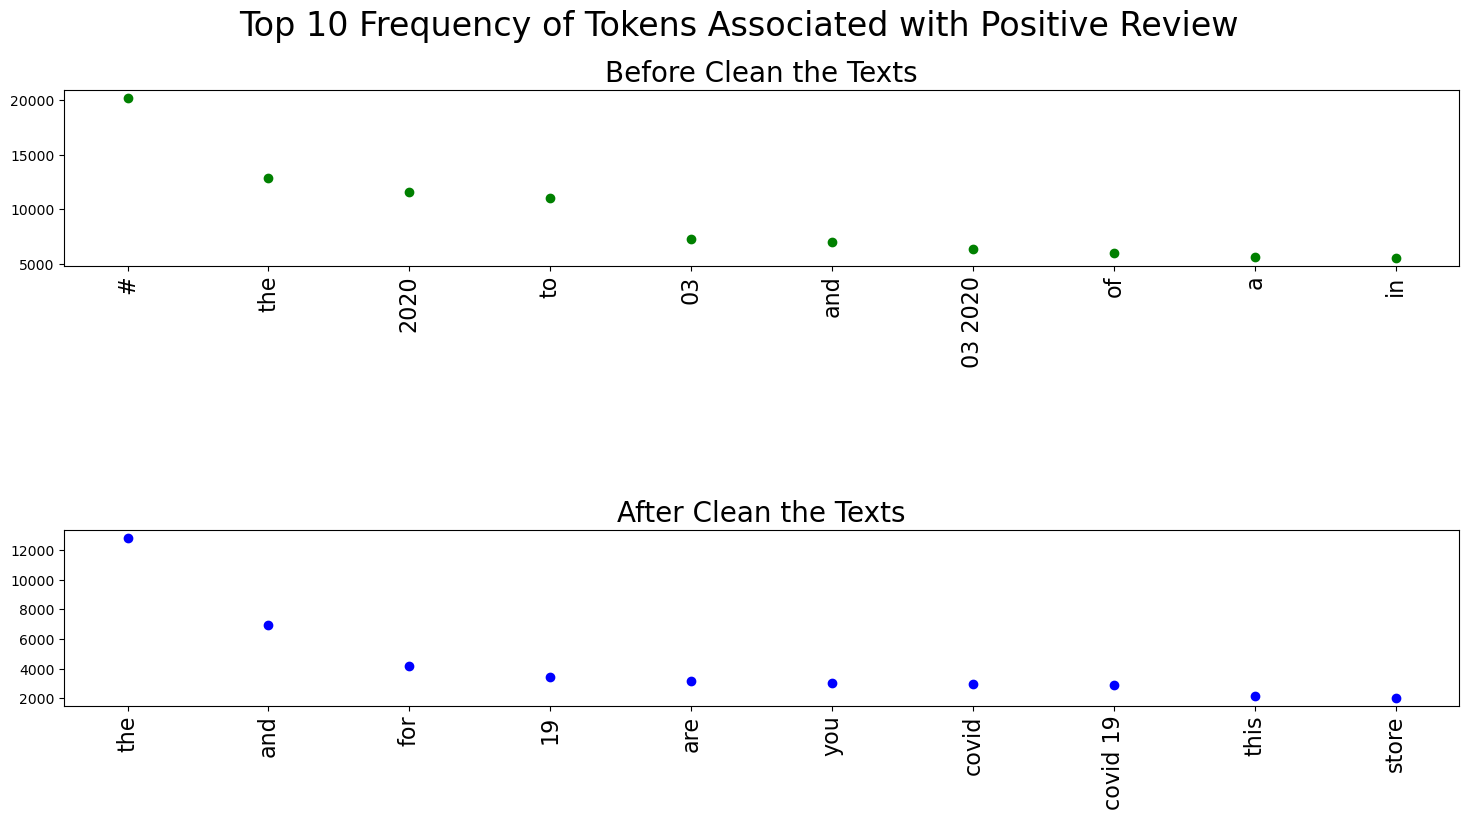

In [40]:
# visualize term frequence of the Tokens Associated with Positive Review

# Specify the top n tokens to plot
top_n = 10 # top 10
term_freq_df_ac_freq = term_freq_df_ac_freq.head(top_n)
term_freq_df_bc_freq = term_freq_df_bc_freq.head(top_n)

x = range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (18, 8))

fig.suptitle('Top 10 Frequency of Tokens Associated with Positive Review', fontsize= 24) # top 10

# Plot x and tf 
ax[0].plot(x, term_freq_df_bc_freq["Positive freq"], 'go') # green circles

ax[0].set_title('Before Clean the Texts', fontsize= 20) 

# Set number of ticks for x-axis
ax[0].set_xticks(x)

# Set ticks labels for x-axis to be the tokens which is the corresponding index
x_ticks_labels = term_freq_df_bc_freq.index
ax[0].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)



# Plot x and tf 
ax[1].plot(x, term_freq_df_ac_freq["Positive freq"], 'bo') # blue circles

ax[1].set_title('After Clean the Texts', fontsize= 20)

# Set number of ticks for x-axis
ax[1].set_xticks(x)

# Set ticks labels for x-axis, which are the corresponding index
x_ticks_labels = term_freq_df_ac_freq.index
ax[1].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

# Adjust horizontal space
fig.subplots_adjust(hspace=1.5)
plt.show()

#### 10- Visualize the top 10 positive scores of the tokens associated with positive tweets using scattertext.

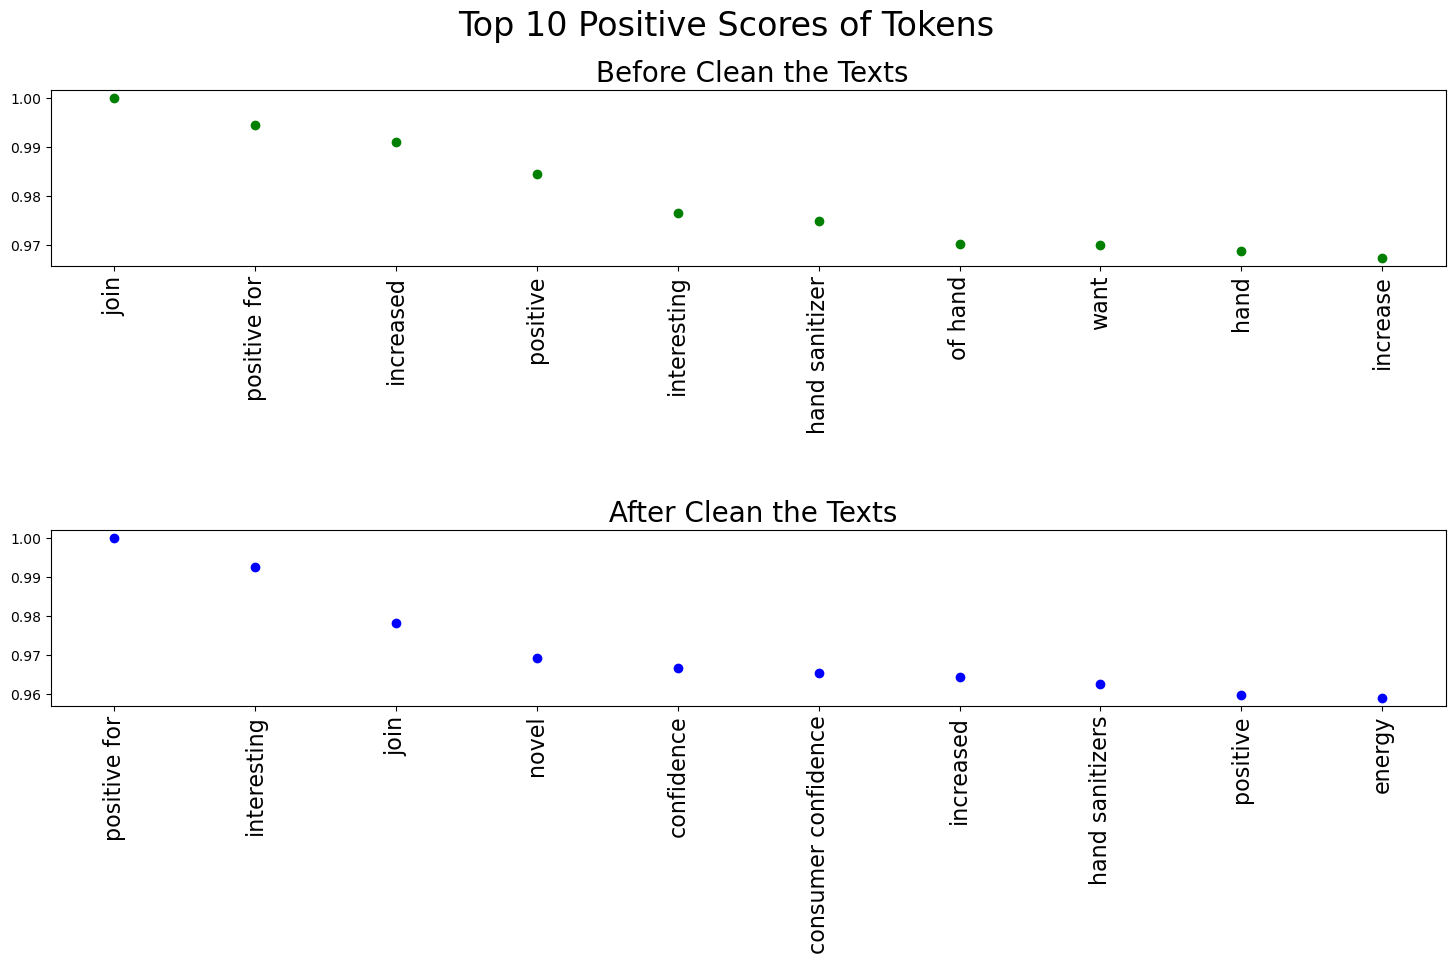

In [41]:
# visualize the scores of tokens associated with positive Reviews. We compare them side by side before cleaning and after cleaning the texts.

import matplotlib.pyplot as plt

top_n = 10   # top 10
term_freq_df_ac_Score = term_freq_df_ac_Score.head(10)
term_freq_df_bc_Score = term_freq_df_bc_Score.head(10)
x = range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (18, 8))

fig.suptitle('Top 10 Positive Scores of Tokens', fontsize= 24) # top 10

# Plot x and scores 
ax[0].plot(x, term_freq_df_bc_Score["Positive Score"], 'go') # green cirlces

ax[0].set_title(' Before Clean the Texts', fontsize= 20) 

# Set number of ticks for x-axis
ax[0].set_xticks(x)

# Set ticks labels for x-axis to be the tokens
x_ticks_labels = term_freq_df_bc_Score.index
ax[0].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)


# Plot x and scores 
ax[1].plot(x, term_freq_df_ac_Score["Positive Score"], 'bo') # blue circles

ax[1].set_title(' After Clean the Texts', fontsize= 20)

# Set number of ticks for x-axis
ax[1].set_xticks(x)

# Set ticks labels for x-axis to be the tokens
x_ticks_labels = term_freq_df_ac_Score.index
ax[1].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

# Adjust horizontal space
fig.subplots_adjust(hspace=1.5)
plt.show()


#### 11- Convert the column of the Tweet_texts to a matrix of token counts using CountVectorizer and unigrams and bigrams.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer

# Created Vectorizer object for CountVectorizer 
# using unigrams is 1-grams and bigrams is 2 grams
vectorizer = CountVectorizer(ngram_range=(1, 2))

# extract toeken counts from clean_text

matrix = vectorizer.fit_transform(corona_train['Tweet_texts_train'].astype(str))
# added .astype(str) to corona_train['Tweet_texts_train']
# to fix error
# ValueError: np.nan is an invalid document, expected byte or unicode string.



# Summarizing the numerical features from texts

print(f'There are {len(corona_train.index)} rows/document in the file.')

print(f'The size of the feature matrix for the texts = {matrix.get_shape()}')

print(f'The first row of the feature matrix = {matrix[0, ]}.')

print(f'There are {matrix[0, ].count_nonzero()}/{matrix.get_shape()[1]} non-zeros')

There are 41157 rows/document in the file.
The size of the feature matrix for the texts = (41157, 447711)
The first row of the feature matrix =   (0, 228330)	1.
There are 1/447711 non-zeros


#### 12- Perform the tf-idf analysis on the column of the Tweet_texts using Tfidfvectorizer.

In [43]:
# tf-idf analysis using Tfidfvectorizer

# Create Tfidfvectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=False)

# fit then convert raw text to matrix of tf-idf feature
tf_idf_matrix_vec = tfidf_vectorizer.fit_transform(corona_train['Tweet_texts_train'].astype(str))

print(f'The size of the tf_idf matrix vectorizer for the texts = {tf_idf_matrix_vec.get_shape()}')
print(f'The sparse tf_idf matrix is as follows:')
print(tf_idf_matrix_vec)

The size of the tf_idf matrix vectorizer for the texts = (41157, 38318)
The sparse tf_idf matrix is as follows:
  (0, 20929)	1.0
  (1, 24814)	0.12930907119733193
  (1, 25046)	0.10841378349849104
  (1, 24142)	0.0822203233746758
  (1, 6640)	0.08655602034856234
  (1, 22065)	0.20250936464213745
  (1, 28559)	0.16829753732951488
  (1, 33354)	0.1229007714891143
  (1, 2514)	0.20329733667699462
  (1, 26732)	0.26125908699309125
  (1, 2354)	0.1929686374724136
  (1, 31175)	0.08824453068859993
  (1, 24676)	0.08929946870987622
  (1, 30826)	0.1479763723258278
  (1, 7658)	0.20495255219324807
  (1, 12482)	0.20863619340233822
  (1, 30385)	0.17301878123697162
  (1, 37644)	0.07250059244913144
  (1, 20731)	0.14320835184119096
  (1, 8911)	0.14543910698804302
  (1, 9497)	0.16949869274083607
  (1, 24258)	0.34699217013950745
  (1, 26097)	0.3283329070847233
  (1, 13121)	0.19958610343129293
  (1, 13505)	0.13200992002108342
  :	:
  (41156, 21050)	0.15605082930266576
  (41156, 23127)	0.12516677130288592
  (41156, 

#### 13- Find the cosine similarity in Tweet_texts between the 200th and 20,000th tweets.

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import spatial

# Find the cosine similarity in clean_text between the two tweets of 200th and 20,000th tweets using the cosine function.

# creating TfidfVectorizer by use of default parameters
tfidf_vector2 = TfidfVectorizer(use_idf=True,smooth_idf=True, sublinear_tf=False)



# using two tweets (observations)
# two tweets 200th to 20_000th [200, 20_000]
obser2 = corona_train.iloc[[199, 19_999]] # 99 - tweet 200, one less because of 0,
#                                     19_999 - tweet 20_000, one less becuase of 0

# Fit to the corpus, 
# then convert the raw documents to
# a matrix of TF-IDF features in numerical values.

# use Tweet_texts_train instead of Phrase

tfidf_matrix2 = tfidf_vector2.fit_transform(obser2['Tweet_texts_train']) 


print(f'The size of the tf-idf matrix for the texts = {tfidf_matrix2.get_shape()}')

# Find the cosine similarity by using cosine distance
# consine distance = 1 - (X.Y)/(|X|*|Y|)

# since we only consider two tweets, we take 0th and 1st.
cos_sim2 = 1 - spatial.distance.cosine(tfidf_matrix2[0, :].toarray().ravel(), tfidf_matrix2[1, :].toarray().ravel())

print(f"The cosine similarity between 200th tweet: {obser2.loc[obser2.index[0], 'Tweet_texts_train']}, \nand 20,000th tweet: {obser2.loc[obser2.index[1], 'Tweet_texts_train']} \nThe cosine similarity is= {cos_sim2}")

# used comma (,) to space everything out

The size of the tf-idf matrix for the texts = (2, 62)
The cosine similarity between 200th tweet: Cambridge    Our retail store will  closed through the end  March   are doing this  keep our staff and customers safe during the COVID 19 crisis   WILL continue  fulfill and ship out orders placed online  Pickups will not  available until  return  regular hours  , 
and 20,000th tweet:     Don  you understand that presently fighting with Covid 19  more important than oil prices     don  know why you people are   irresponsible  You just oppose     from BJP have you seen how   managing the fight agai 
The cosine similarity is= 0.05300768406796952


#### 14- Find the corpus vector equal to the average of all the document vectors, where each document corresponds to a tweet or a row in this dataset.

In [45]:
# compute the length in the denominator or bottom of a faction
from scipy.sparse.linalg import norm 

nlp7 = spacy.load("en_core_web_lg")

newtweet2 = corona_train.astype(str) # needed or got error

avg_tweet_vec= np.array([nlp7(doc7).vector for doc7 in newtweet2['Tweet_texts_train']]).mean(axis=0)

print(avg_tweet_vec) 

[-0.5049072  -0.03949471 -1.2980113   0.62574244  2.166988    0.04223408
  0.4569165   2.1546037  -0.74582404  0.16722013  2.8008752   0.8530294
 -2.7606525   0.8908738   0.26345286  0.46833098  1.3204594  -0.47183153
 -0.9106257  -0.9327073   0.29420403  0.12356236 -0.48649058 -0.4418716
 -0.36182052 -0.5519844  -1.5765811  -0.6336237  -0.13537833  0.46100426
  1.6692942   0.07552858 -0.49530807 -1.2718091  -0.5542615  -0.9077342
 -0.01704191  0.95340955  0.79170626  0.4408012   0.17956273  0.5296124
  0.05804719  0.44983116 -0.9455922   0.96888715  0.7959903  -1.582757
  0.2982585   0.7946263  -0.03830292  1.1183057  -0.18809754 -2.772877
 -0.6461192   0.66682434 -0.5272339   0.7346511   0.7067822   0.17064254
  0.73051894 -0.00387416 -0.22649343 -0.93418777  1.6418741   0.65057117
 -2.0082717  -1.1109416   0.29033548  1.0899     -0.14088255 -0.20614097
 -0.9563383   0.0530455  -0.03486892  1.193117   -0.7587657   0.52427083
 -0.81343704 -0.09831323 -2.140009    0.20557976  0.4282409

______________________________________________________________________________
## For steps 15 to 20, we want to forecast Sentiment using Tweet_texts.
_____________________________________________________________________________

####  Old Combinding corona_train['Sentiment'] and corona_train['Tweet_texts']

In [48]:
# combinding corona_train['Sentiment'] and corona_test['Sentiment']

#df2 = corona_train['Sentiment']
#df = corona_test['Sentiment']
#corona_train['combine_Sentiment']  = df.append(df2, ignore_index = True)

In [49]:
# corona_train['combine_Sentiment']

In [50]:
# combinding corona_train['Tweet_texts_train'] and corona_test['Tweet_texts_test']

#df3 = corona_train['Tweet_texts_train']
#df4 = corona_test['Tweet_texts_test']
#corona_train['combine_Tweet_texts']  = df4.append(df3, ignore_index = True)


#### New combinding of corona_train and corona_test

In [40]:
merge_corona = pd.concat([corona_train, corona_test], ignore_index = True)

In [41]:
merge_corona.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'Tweet_texts_train', 'unclean_Tweet_texts_train',
       'clean_len_tweet_texts_train', 'unclean_len_tweet_texts_train',
       'count_word_bc', 'count_word_ac', 'Tweet_texts_test',
       'unclean_Tweet_texts_test', 'clean_len_tweet_texts_test',
       'unclean_len_tweet_texts_test'],
      dtype='object')

In [69]:
# type(merge_corona['Tweet_texts_train'])
# type(merge_corona['Tweet_texts_test'])

# merge_corona['Tweet_texts_train']
#d4 = merge_corona['Tweet_texts_test']


In [68]:
# merge_corona['new_Tweet_texts'] = d4.append(d3, ignore_index = True)

#### Old Same of data 1,000 rows

In [ ]:
# sample of data
# corona_sample = corona_train.iloc[20_058:21_058]

# print(corona_sample.shape)

##### new sample of 2,000 based of new merge

In [70]:
# corona_sample = merge_corona.iloc[20_058:21_058] # 1,000 samples

corona_sample = merge_corona.iloc[19_558:21_558] # 2,000 samples

# print(corona_sample.shape)

In [72]:
# target (forcast Sentiment) 
# feature (Tweet_texts)
sample_combine_Sentiment_Tweet_texts = corona_sample[['Sentiment', 'Tweet_texts_train']] # ['combine_Sentiment', 'combine_Tweet_texts']

In [73]:
sample_combine_Sentiment_Tweet_texts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 19558 to 21557
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sentiment          2000 non-null   object
 1   Tweet_texts_train  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [74]:
# checking distribution of the target Sentiment
sample_combine_Sentiment_Tweet_texts['Sentiment'].value_counts(normalize= True) # 'combine_Sentiment'

Sentiment
Positive             0.29
Negative             0.24
Neutral              0.17
Extremely Positive   0.17
Extremely Negative   0.12
Name: proportion, dtype: float64

In [75]:
# tokenization and lemmatization

nlp2 = spacy.load("en_core_web_sm") # loading in small model

stop_words = spacy.lang.en.stop_words.STOP_WORDS # idenitying stop words

# creating tokenzer function from a sentence
def spacy_tokenizer(sen):

    mytokens = nlp2(sen) # split sentence into tokens/ words

    # removing stop words and getting lemma to decrease the number of features
    # an is example (go, goes, went, going); are (4 features) and we only need to keep (go) (one feature)
    mytokens = [ w.lemma_ for w in mytokens if w not in stop_words]
    return mytokens

In [76]:
# using scikit-learn transformer to clean text of the tweet

class features(TransformerMixin):
    def transform(self, X, **transform_params):

        # the two columns we will be using is ['combine_Sentiment', 'combine_Tweet_texts'] for the models
        # ['combine_Tweet_texts'] is the feature and ['combine_Sentiment'] is the target

        # we wil clean the text
        return [clean_text(text) for text in X]

    def fit(self, X, y= None, **fit_params):
        return self

    def get_params(self, deep= True):
        return {}

# function to clean the text
def clean_text(text):
    # Removing nan, @, punctuation, URLs, or/ and any non alpanumeric characters
    # then converting the text into lowercase

    text = ' '.join(re.sub("(nan)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", text).split())

    # remove all spaces and converting the text into lowercase
    return text.strip().lower()

In [77]:
# forecast 'combine_Sentiment'

# checking distribution of the target 'combine_Sentiment'
sample_combine_Sentiment_Tweet_texts['Sentiment'].value_counts(normalize= True)  # 'combine_Sentiment'
# the data is split equally as seen in full dataset and now seen in sample data

Sentiment
Positive             0.29
Negative             0.24
Neutral              0.17
Extremely Positive   0.17
Extremely Negative   0.12
Name: proportion, dtype: float64

In [78]:
le1 = preprocessing.LabelEncoder()
# ['combine_Sentiment']
sample_combine_Sentiment_Tweet_texts['Sentiment']= le1.fit_transform(sample_combine_Sentiment_Tweet_texts['Sentiment'])
sample_combine_Sentiment_Tweet_texts['Sentiment'].value_counts(normalize= True)

Sentiment
4   0.29
2   0.24
3   0.17
1   0.17
0   0.12
Name: proportion, dtype: float64

In [79]:
sample_combine_Sentiment_Tweet_texts.dtypes

Sentiment             int32
Tweet_texts_train    object
dtype: object

#### 15- Build the first model based on the training dataset using the random forests and pipeline.
 

In [80]:
# combine_Sentiment is target and combine_Tweet_textsis feature
X = sample_combine_Sentiment_Tweet_texts['Tweet_texts_train'] # feature # ['combine_Tweet_texts']
y = sample_combine_Sentiment_Tweet_texts['Sentiment'] # target  # ['combine_Sentiment']

# splitting the data 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print(f'X_train dimension: {X_train.shape}; y_train dimension: {y_train.shape}')
print(f'X_test dimension: {X_test.shape}; y_train dimension: {y_test.shape}')

X_train dimension: (1600,); y_train dimension: (1600,)
X_test dimension: (400,); y_train dimension: (400,)


In [81]:
print(np.unique(y))

[0 1 2 3 4]


In [82]:
# Build the first model based on the training dataset using the random forests and pipeline.

# timeing the code running
timeCode = time()

# override the string tokenization
tf_idf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer, ngram_range = (1,1))

# random forests
clf = RandomForestClassifier()

# create pipeline based on cleaner, vectorizer, and random forests

pipeline1 = Pipeline ([("cleaner", features()), # transform method in the features class
                       
                      ("vectorizer", tf_idf_vector), #  tf-idf vectorizer to convert into numerical values

                      ("classifier", clf)]) # fit and transform for the random forests

# fit the model for the training data
pipeline1.fit(X_train, y_train)

print(f'The first pipeline takes about {time() - timeCode:.1f} seconds to run')

The first pipeline takes about 20.0 seconds to run


##### 16- Check the first model on the test dataset. Is it a good model based on the selected evaluation metrics? Please justify your answer.


Confusion matrix, without normalization
[[12  0 19  2 16]
 [ 1 10  7  4 46]
 [ 1  2 44  8 40]
 [ 0  0  6 33 31]
 [ 1  9 11 18 79]]
Normalized confusion matrix
[[0.24489796 0.         0.3877551  0.04081633 0.32653061]
 [0.01470588 0.14705882 0.10294118 0.05882353 0.67647059]
 [0.01052632 0.02105263 0.46315789 0.08421053 0.42105263]
 [0.         0.         0.08571429 0.47142857 0.44285714]
 [0.00847458 0.07627119 0.09322034 0.15254237 0.66949153]]


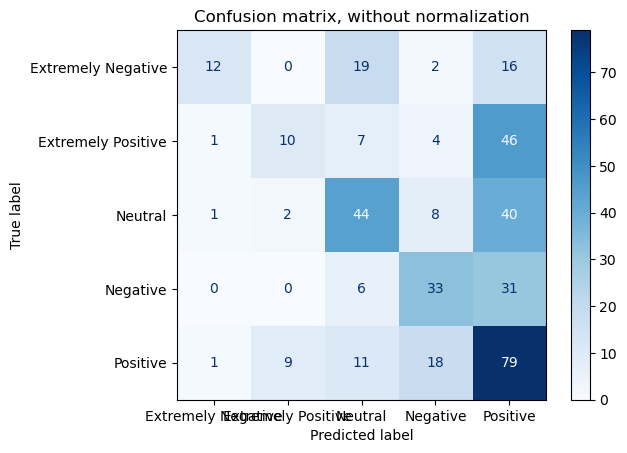

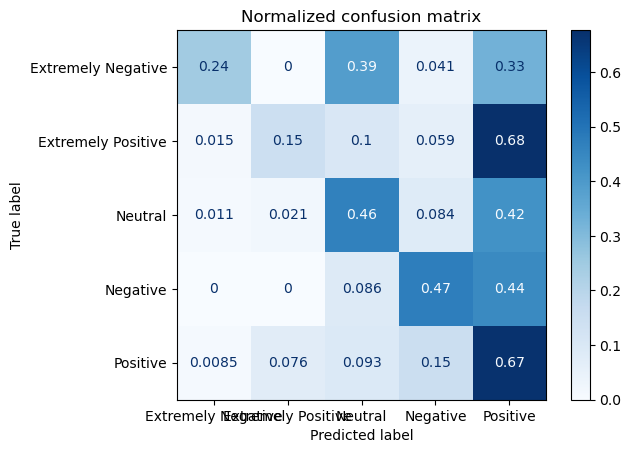

In [83]:
# imbalanced classification
# use f1-score and evaluation metrics
# looking at confusion matrix

# target names     0                         1                2          3              4
targetNames = ['Extremely Negative', 'Extremely Positive', 'Neutral', 'Negative', 'Positive']

# Positive             4
# Negative             3 
# Neutral              2
# Extremely Positive   1
# Extremely Negative   0

# plot titles
titles_plots1 = [("Confusion matrix, without normalization", None), # for count
           ("Normalized confusion matrix", 'true')] # for percent

# create two confusion matrixes, we have titles and normalize
for title, normalize in titles_plots1:
    dispCM = ConfusionMatrixDisplay.from_estimator(pipeline1, X_test, y_test,
                                 display_labels= targetNames,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    dispCM.ax_.set_title(title)

    print(title)
    print(dispCM.confusion_matrix)

plt.show()



In [84]:
# Predict the test data
y_pred4 = pipeline1.predict(X_test)

# Print out the report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.80      0.24      0.38        49
           1       0.48      0.15      0.22        68
           2       0.51      0.46      0.48        95
           3       0.51      0.47      0.49        70
           4       0.37      0.67      0.48       118

    accuracy                           0.45       400
   macro avg       0.53      0.40      0.41       400
weighted avg       0.50      0.45      0.43       400



####  Is it a good model based on the selected evaluation metrics? Please justify your answer.

When looking at the first model, we can see it performed poorly. The confusion matrices show the actual positive as predicted positive 78 but continue to worsen further up the diagonal line of TP and TN. The actual true labels of Extremely Negative, Extremely Positive, Neural, and Negative are all incorrectly predicted as the label of positive. 

The classification report shows that the f1-scores are below 0.70, Extremely Negative 0: 0.27, Extremely Positive 1: 0.27, Neutral 2: 0.41, Negative 3: 0.46, Positive 4: 0.47. 

The accuracy is 0.42. The model is not good.


#### 17- Create the second model using pipeline, grid search CV for the hyperparameters for the estimators. 
(Please see all the potential parameters at Scikit Learn's:
 * TfidVectorizer: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
 * random forests: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
)


In [85]:
# performing a grid search using GridSearchCV on the hyperparameters of the transformers/estimators

# creating the 2nd model using pipeline

# Create pipeline using ceaner, tf-idf and Random Forest Classifier
pipeline2 = Pipeline ([("cleaner", features()), # features class
                       ("vectorizer", TfidfVectorizer(tokenizer = spacy_tokenizer)), # tf-idf vectorizer
                       ("classifier", RandomForestClassifier())]) # Random Forest 


parameters2 = {
    'vectorizer__max_df': (0.5, 1.0), #try 50%, 100%; typically in a tuple
    'vectorizer__ngram_range': ((1, 1), (1,2)),  # unigrams or bigrams
    'vectorizer__use_idf': (True, False),
    # had to remove C and gamma can't be used with RandomForestClassifier
}

# perfrom gridsearch CV
gridSearch  = GridSearchCV(pipeline2, parameters2, n_jobs=1, verbose=1)


print("__Performing the grid search__")
print("Pipeline2 contains:", [n for n, _ in pipeline2.steps])
print()
print("The parameters are:")


# printing the parameters using pprint for formatting the output to make it easier to read
pprint(parameters2)

# Time it takes for the code to run
timeCode2 = time()
print()
gridSearch.fit(X_train, y_train) #  fit the model for the training data
print(f'The 2nd pipeline takes about {time() - timeCode2:.1f} seconds to run')
print()

print(f"Best score= {gridSearch.best_score_:0.3f}")

print("Best parameters set:")
best_parameters = gridSearch.best_estimator_.get_params()
for param_name in sorted(parameters2.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

__Performing the grid search__
Pipeline2 contains: ['cleaner', 'vectorizer', 'classifier']

The parameters are:
{'vectorizer__max_df': (0.5, 1.0),
 'vectorizer__ngram_range': ((1, 1), (1, 2)),
 'vectorizer__use_idf': (True, False)}

Fitting 5 folds for each of 8 candidates, totalling 40 fits
The 2nd pipeline takes about 606.7 seconds to run

Best score= 0.395
Best parameters set:
	vectorizer__max_df: 1.0
	vectorizer__ngram_range: (1, 1)
	vectorizer__use_idf: False


##### 18- Tune the second model and perform model diagnostics on the test dataset. Is it a good model? Please justify your answer.


Confusion matrix, without normalization
[[ 8  0 20  3 18]
 [ 1 14  5  3 45]
 [ 1  1 34 12 47]
 [ 0  0  5 30 35]
 [ 2 18 13  9 76]]
Normalized confusion matrix
[[0.16326531 0.         0.40816327 0.06122449 0.36734694]
 [0.01470588 0.20588235 0.07352941 0.04411765 0.66176471]
 [0.01052632 0.01052632 0.35789474 0.12631579 0.49473684]
 [0.         0.         0.07142857 0.42857143 0.5       ]
 [0.01694915 0.15254237 0.11016949 0.07627119 0.6440678 ]]


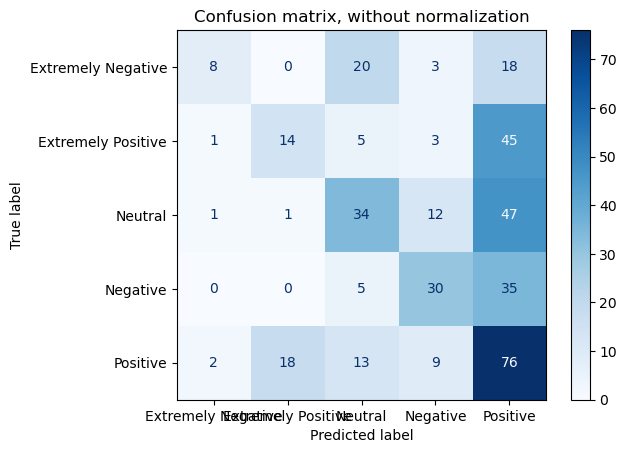

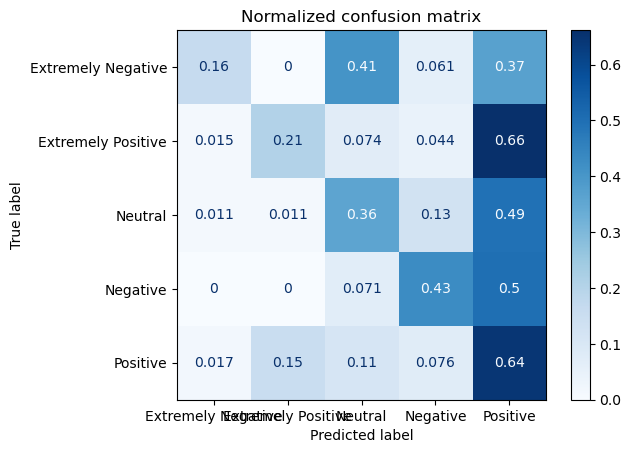

In [86]:
# perform model diagnostics

# use f1-score and evaluation metrics
# looking at confusion matrix

# target names     0                         1                2          3              4
targetNames = ['Extremely Negative', 'Extremely Positive', 'Neutral', 'Negative', 'Positive']

# plot titles
titles_plots2 = [("Confusion matrix, without normalization", None), # for count
            ("Normalized confusion matrix", 'true')] # for percent

# create two confusion matrixes, we have titles and normalize
for title, normalize in titles_plots2:
    dispCM = ConfusionMatrixDisplay.from_estimator(gridSearch, X_test, y_test,
                                display_labels= targetNames,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    dispCM.ax_.set_title(title)

    print(title)
    print(dispCM.confusion_matrix)

plt.show()

In [87]:
# classification report
# Predict the test data
y_pred6 = gridSearch.predict(X_test)

# Print out the report
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.67      0.16      0.26        49
           1       0.42      0.21      0.28        68
           2       0.44      0.36      0.40        95
           3       0.53      0.43      0.47        70
           4       0.34      0.64      0.45       118

    accuracy                           0.41       400
   macro avg       0.48      0.36      0.37       400
weighted avg       0.45      0.41      0.39       400



#### Is it a good model? Please justify your answer.

When looking at the second model we can see it performed poorly. The confusion matrices show the actual positive as predicted positive 86 but continue to worsen further up the diagonal line of TP and TN. The actual true labels of Extremely Negative, Extremely Positive, Neural, and Negative are all incorrectly predicted as the label of positive. 

The classification report shows that the f1-scores are below 0.70, Extremely Negative 0: 0.39, Extremely Positive 1: 0.32, Neutral 2: 0.48, Negative 3: 0.41, Positive 4: 0.50. 

The accuracy is 0.45. The model is not good.


#### 19- Build the third model using pipeline, grid search CV, hyperparameter for the following classifiers:
* Logistic Regression
* Support Vector Machine
* Random Forest


In [88]:
# using grid search CV for the hyperparameters in classifiers

# creating a switch class that can handle different classifiers
# Using an estimator class from BaseEstimator class to handle different classifiers
# SGDClassifier used to change the default alogrithm of other methods

#  working on classifaction alogroithmns use the class name ClfSwitcher
#  if working on several regression algorithsm, use the class name to RegSwitcher

# identifing classification algorthims
# https://www.datacamp.com/blog/classification-machine-learning

class ClfSwitcher(BaseEstimator):

    # Initialize the estimator using SGDClassifier
    def __init__(
        self,
        estimator = SGDClassifier(), #set SGDClassifier which is the default
    ):
        # there is a data member called estimator
        self.estimator = estimator


    # Fit the model using the given estimator
    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self

    # Predict the label using estimator
    def predict(self, X, y=None):
        return self.estimator.predict(X)



    # classification problem, we need to use the predict_proba method to forecast probability

    # if it is a Regression alogrithms, need to  remove the predict_proba method,
    # since there is no probablities at all for regressions
    # if regression remove remove the predict_proba method

    def predict_proba(self, X):
        return self.estimator.predict_proba(X)

    # find the score using the given estimator
    def score(self, X, y):
        return self.estimator.score(X, y)

In [89]:
# Control + M M will convert a code cell to a text cell.
# Control + M Y will convert a text cell to a code cell.
# Perform Hyperparameter Search

# creating pipeline3

pipeline3 = Pipeline ([("cleaner", features()), # feature class
                 ("vectorizer", TfidfVectorizer()), # tf-idf vectorizer
                 ("classifier", ClfSwitcher())]) # classification switcher from class created

# classifiers:
#  * Logistic regression
#  * Support Vector Machine
#  * Random Forest

# creating hyperparameters using dictionaries for each of the classifiers
# 3 dictionaries for classifiers

parameters3 = [
    # 1st dictionary is Logistic regression
    {
        'vectorizer__tokenizer': [spacy_tokenizer],
        'vectorizer__max_df': [1.0],
        'vectorizer__norm': ('l1', 'l2'),
        'vectorizer__stop_words': ['english', None],
        'classifier__estimator': [LogisticRegression()], # the first algorithm, Logistic regression
        
        # solver, penalty, and regularization strength (C)
        'classifier__estimator__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'classifier__estimator__penalty': ('l2', 'elasticnet', 'l1'),
        'classifier__estimator__C': [1, 10], # using two paramater instead of 3, it takes to long to run
        
    },
    # 2nd dictionary is Support Vector Machine
    {
        'vectorizer__tokenizer': [spacy_tokenizer],
        'vectorizer__max_df': [1.0],
        'vectorizer__norm': ('l1', 'l2'),
        'vectorizer__stop_words': ['english', None],
        'classifier__estimator': [SVC()], # the 2nd algorithm, Support Vector Machine
        
        # kernel , C , and gamma 
        'classifier__estimator__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
        'classifier__estimator__C': [1, 10],
        'classifier__estimator__gamma': ['scale', 'auto'],   
        
    },
    # 3rd dictionary is Random Forest
    {
        'vectorizer__tokenizer': [spacy_tokenizer],
        'vectorizer__max_df': [1.0],
        'vectorizer__norm': ('l1', 'l2'),
        'vectorizer__stop_words': ['english', None],
        'classifier__estimator': [ RandomForestClassifier()], # the 3rd algorithm, Random Forest
        
        # max_features, n_estimators, criterion
        'classifier__estimator__max_features': ['sqrt', 'log2'],
        'classifier__estimator__n_estimators': [100],
        'classifier__estimator__criterion': ['gini', 'entropy', 'log_loss'],
        
        
    },
]


print("__Performing the grid search__")
print("Pipeline3 contains:", [n for n, _ in pipeline3.steps])
print()
print("The parameters are:")


# printing the parameters using pprint for formatting the output to make it easier to read
pprint(parameters3)

# Time it takes for the code to run
timeCode3 = time()

# perfrom grid search CV
gridSearch3  = GridSearchCV(pipeline3, parameters3, cv=5, n_jobs= 1, return_train_score=False, verbose=3) # error_score='raise'

# ValueError:
# All the 60 fits failed.
# It is very likely that your model is misconfigured.
# You can try to debug the error by setting error_score='raise'.

gridSearch3.fit(X_train, y_train) #  fit the model for the training data,

print(f'The 3rd pipeline takes about {time() - timeCode3:.1f} seconds to run')

__Performing the grid search__
Pipeline3 contains: ['cleaner', 'vectorizer', 'classifier']

The parameters are:
[{'classifier__estimator': [LogisticRegression()],
  'classifier__estimator__C': [1, 10],
  'classifier__estimator__penalty': ('l2', 'elasticnet', 'l1'),
  'classifier__estimator__solver': ['lbfgs',
                                    'liblinear',
                                    'newton-cg',
                                    'newton-cholesky',
                                    'sag',
                                    'saga'],
  'vectorizer__max_df': [1.0],
  'vectorizer__norm': ('l1', 'l2'),
  'vectorizer__stop_words': ['english', None],
  'vectorizer__tokenizer': [<function spacy_tokenizer at 0x00000216B0AEA940>]},
 {'classifier__estimator': [SVC()],
  'classifier__estimator__C': [1, 10],
  'classifier__estimator__gamma': ['scale', 'auto'],
  'classifier__estimator__kernel': ['linear',
                                    'poly',
                                    

In [90]:
# getting optimal parameters

print(f"Best score= {gridSearch3.best_score_:0.3f}")
print()
best_parameters3 = gridSearch3.best_estimator_.get_params() # find best parameters

# loop over the parametersto find all algorthms in the pipeline
all_alg =[]
for p in parameters3:
    all_alg.append(p['classifier__estimator'])
all_alg = [str(a) for clf in all_alg for a in clf] # idenitfy classifiers (clf)

print("All potential classifiers:")
pprint(all_alg) # finding all classifiers

# Find the location of the optimal classifier
locat = all_alg.index(str(best_parameters3['classifier__estimator']))
print("Best parameters set:")
for param_name in sorted(parameters3[locat].keys()):
    print("\t%s: %r" % (param_name, best_parameters3[param_name]))

Best score= 0.426

All potential classifiers:
["LogisticRegression(C=10, penalty='l1', solver='saga')",
 'SVC()',
 'RandomForestClassifier()']
Best parameters set:
	classifier__estimator: LogisticRegression(C=10, penalty='l1', solver='saga')
	classifier__estimator__C: 10
	classifier__estimator__penalty: 'l1'
	classifier__estimator__solver: 'saga'
	vectorizer__max_df: 1.0
	vectorizer__norm: 'l2'
	vectorizer__stop_words: 'english'
	vectorizer__tokenizer: <function spacy_tokenizer at 0x00000216B0AEA940>


#### 20- Tune the third model and perform model diagnostics on the test dataset. Is it a good model? Please justify your answer.


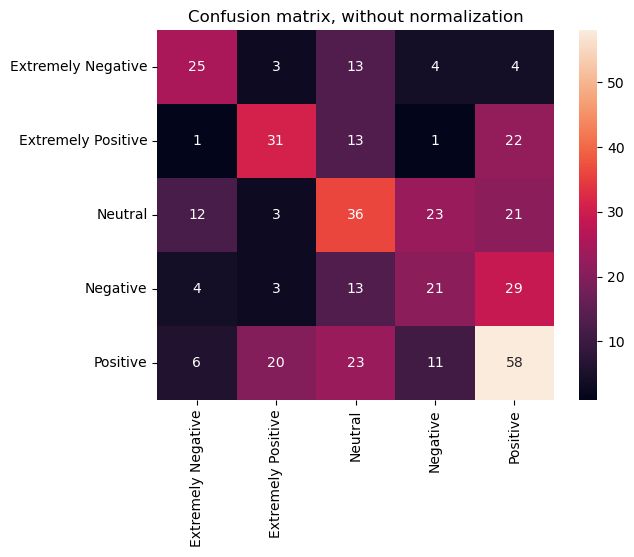

In [91]:
# model diagnostics

# plot confusion matrix using seaborn

# Predict the labels for test data
y_pred8 = gridSearch3.predict(X_test)

# Generate the confusion matrix
# use the true label of y_test and predicted label of y_pred8
cm8 = confusion_matrix(y_test, y_pred8)

# create axes for plot
axes8 = plt.axes()

# Plot the heatmap of the confusion matrix without normalization
# formated count/integers using  fmt = 'd'
sns.heatmap(cm8, annot=True, fmt = 'd',  xticklabels = targetNames, yticklabels = targetNames)

axes8.set_title("Confusion matrix, without normalization")
plt.show()

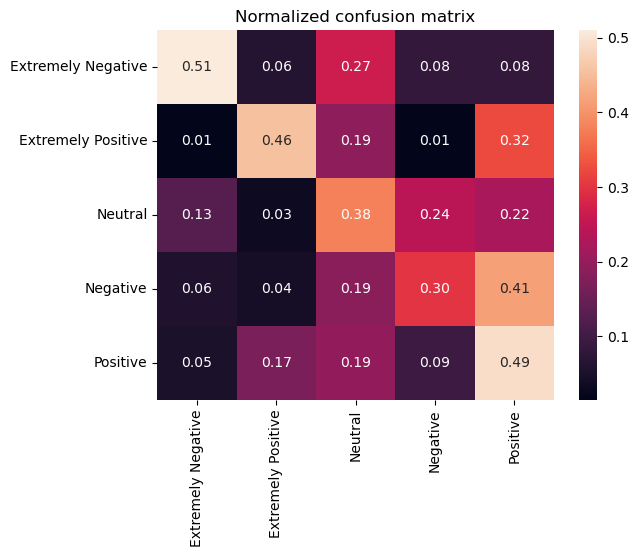

In [92]:
# creating normalized confusion matrix

# plot confusion matrix using seaborn

# Predict the labels for test data
y_pred8p2 = gridSearch3.predict(X_test)

# Generate the confusion matrix
# use the true label of y_test and predicted label of y_pred8p2
cm8p2 = confusion_matrix(y_test, y_pred8p2)

# Normalize the confusion matrix
# by dividing each number by the sum of of the corresponding rows to get probablity
cm8p2 = cm8p2 / cm8p2.astype(np.float64).sum(axis=1)[:,None]


# create axes for plot
axes8p2 = plt.axes()

# Plot the heatmap of the normalized confusion matrix
# format into two decimal places using fmt = '.2f'
sns.heatmap(cm8p2, annot=True, fmt = '.2f',  xticklabels = targetNames, yticklabels = targetNames)

axes8p2.set_title("Normalized confusion matrix")
plt.show()

In [93]:
# classification report

# Predicting the test dataset
y_pred9 = gridSearch3.predict(X_test)

# printing classification report
print(classification_report(y_test, y_pred9))

              precision    recall  f1-score   support

           0       0.52      0.51      0.52        49
           1       0.52      0.46      0.48        68
           2       0.37      0.38      0.37        95
           3       0.35      0.30      0.32        70
           4       0.43      0.49      0.46       118

    accuracy                           0.43       400
   macro avg       0.44      0.43      0.43       400
weighted avg       0.43      0.43      0.43       400



#### Is it a good model? Please justify your answer.

When looking at the third model, we can see it performed poorly. The confusion matrices show the actual positive as predicted positive 57 but continue to worsen (a little) the further up the diagonal line of TP and TN. The actual true labels of Extremely Negative, Extremely Positive, Neural, and Negative are all incorrectly predicted as the label of positive. 

The classification report shows that the f1-scores are below 0.70, Extremely Negative 0: 0.52, Extremely Positive 1: 0.48, Neutral 2: 0.37, Negative 3: 0.32, Positive 4: 0.45. 

The accuracy is 0.42. The model is not good.


#### 21- Generate the first topic model by setting five topics using LDA method and CountVectorizer.


In [41]:
# LDA Method
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

LDATFVectorizer = CountVectorizer(max_df=0.90, min_df=5, stop_words='english')

# creating a vectorized matrix that LDA model can utilize
LDADocumentWordWatrixTF = LDATFVectorizer.fit_transform(corona_train['Tweet_texts_train']) 

#Set ncomponents to 5 to account for each sentiment value
LDA = LatentDirichletAllocation(n_components= 5 ,random_state= 100) # seed 100

# fit the LDA model to the previously created matrix
LDA.fit(LDADocumentWordWatrixTF)

LatentDirichletAllocation(n_components=5, random_state=100)

#### 22- Plot the top 15 words for each topic for the model above.


In [42]:
TopWords = 15 

# plotting the top 15 words from the LDA model
for i,topic in enumerate(LDA.components_):
    print(f'THE TOP {TopWords} WORDS FOR TOPIC #{i}')
    print([LDATFVectorizer.get_feature_names_out()[name] for name in topic.argsort()[-TopWords:]])
    print('#'*150)

THE TOP 15 WORDS FOR TOPIC #0
['amp', 'coronavirus', 'customers', 'workers', 'pandemic', 'stores', 'consumer', 'help', 'retail', 'new', 'usa', 'grocery', 'covid', 'store', '19']
######################################################################################################################################################
THE TOP 15 WORDS FOR TOPIC #1
['impact', 'chain', 'crisis', 'coronavirus', 'shopping', 'amp', 'pandemic', 'new', 'supply', 'online', 'demand', 'covid', 'consumer', '19', 'food']
######################################################################################################################################################
THE TOP 15 WORDS FOR TOPIC #2
['crisis', 'global', 'demand', 'low', 'new', 'market', 'india', 'pandemic', 'price', 'amp', 'oil', 'consumer', 'covid', '19', 'prices']
######################################################################################################################################################
THE TOP 15 WORDS FOR TOPI

In [70]:
targetNames = ['Extremely Negative', 'Extremely Positive', 'Neutral', 'Negative', 'Positive']
def plottingTopWords(model, feature_names, TopWords, title):
   # plt.subplots(2, 3) for charts below
    fig, axes = plt.subplots(2, 3, figsize=(30, 20), sharex=True)

    # flatten the axes (2 dimensions (2,2)
    axes = axes.flatten()
    
    # Loop over all the topics that is = 4 in our example
    # get the corresponding topic index and topic
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-TopWords - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
  
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic: {targetNames[topic_idx]}', fontsize= 30) # increasing front size

        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)

        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

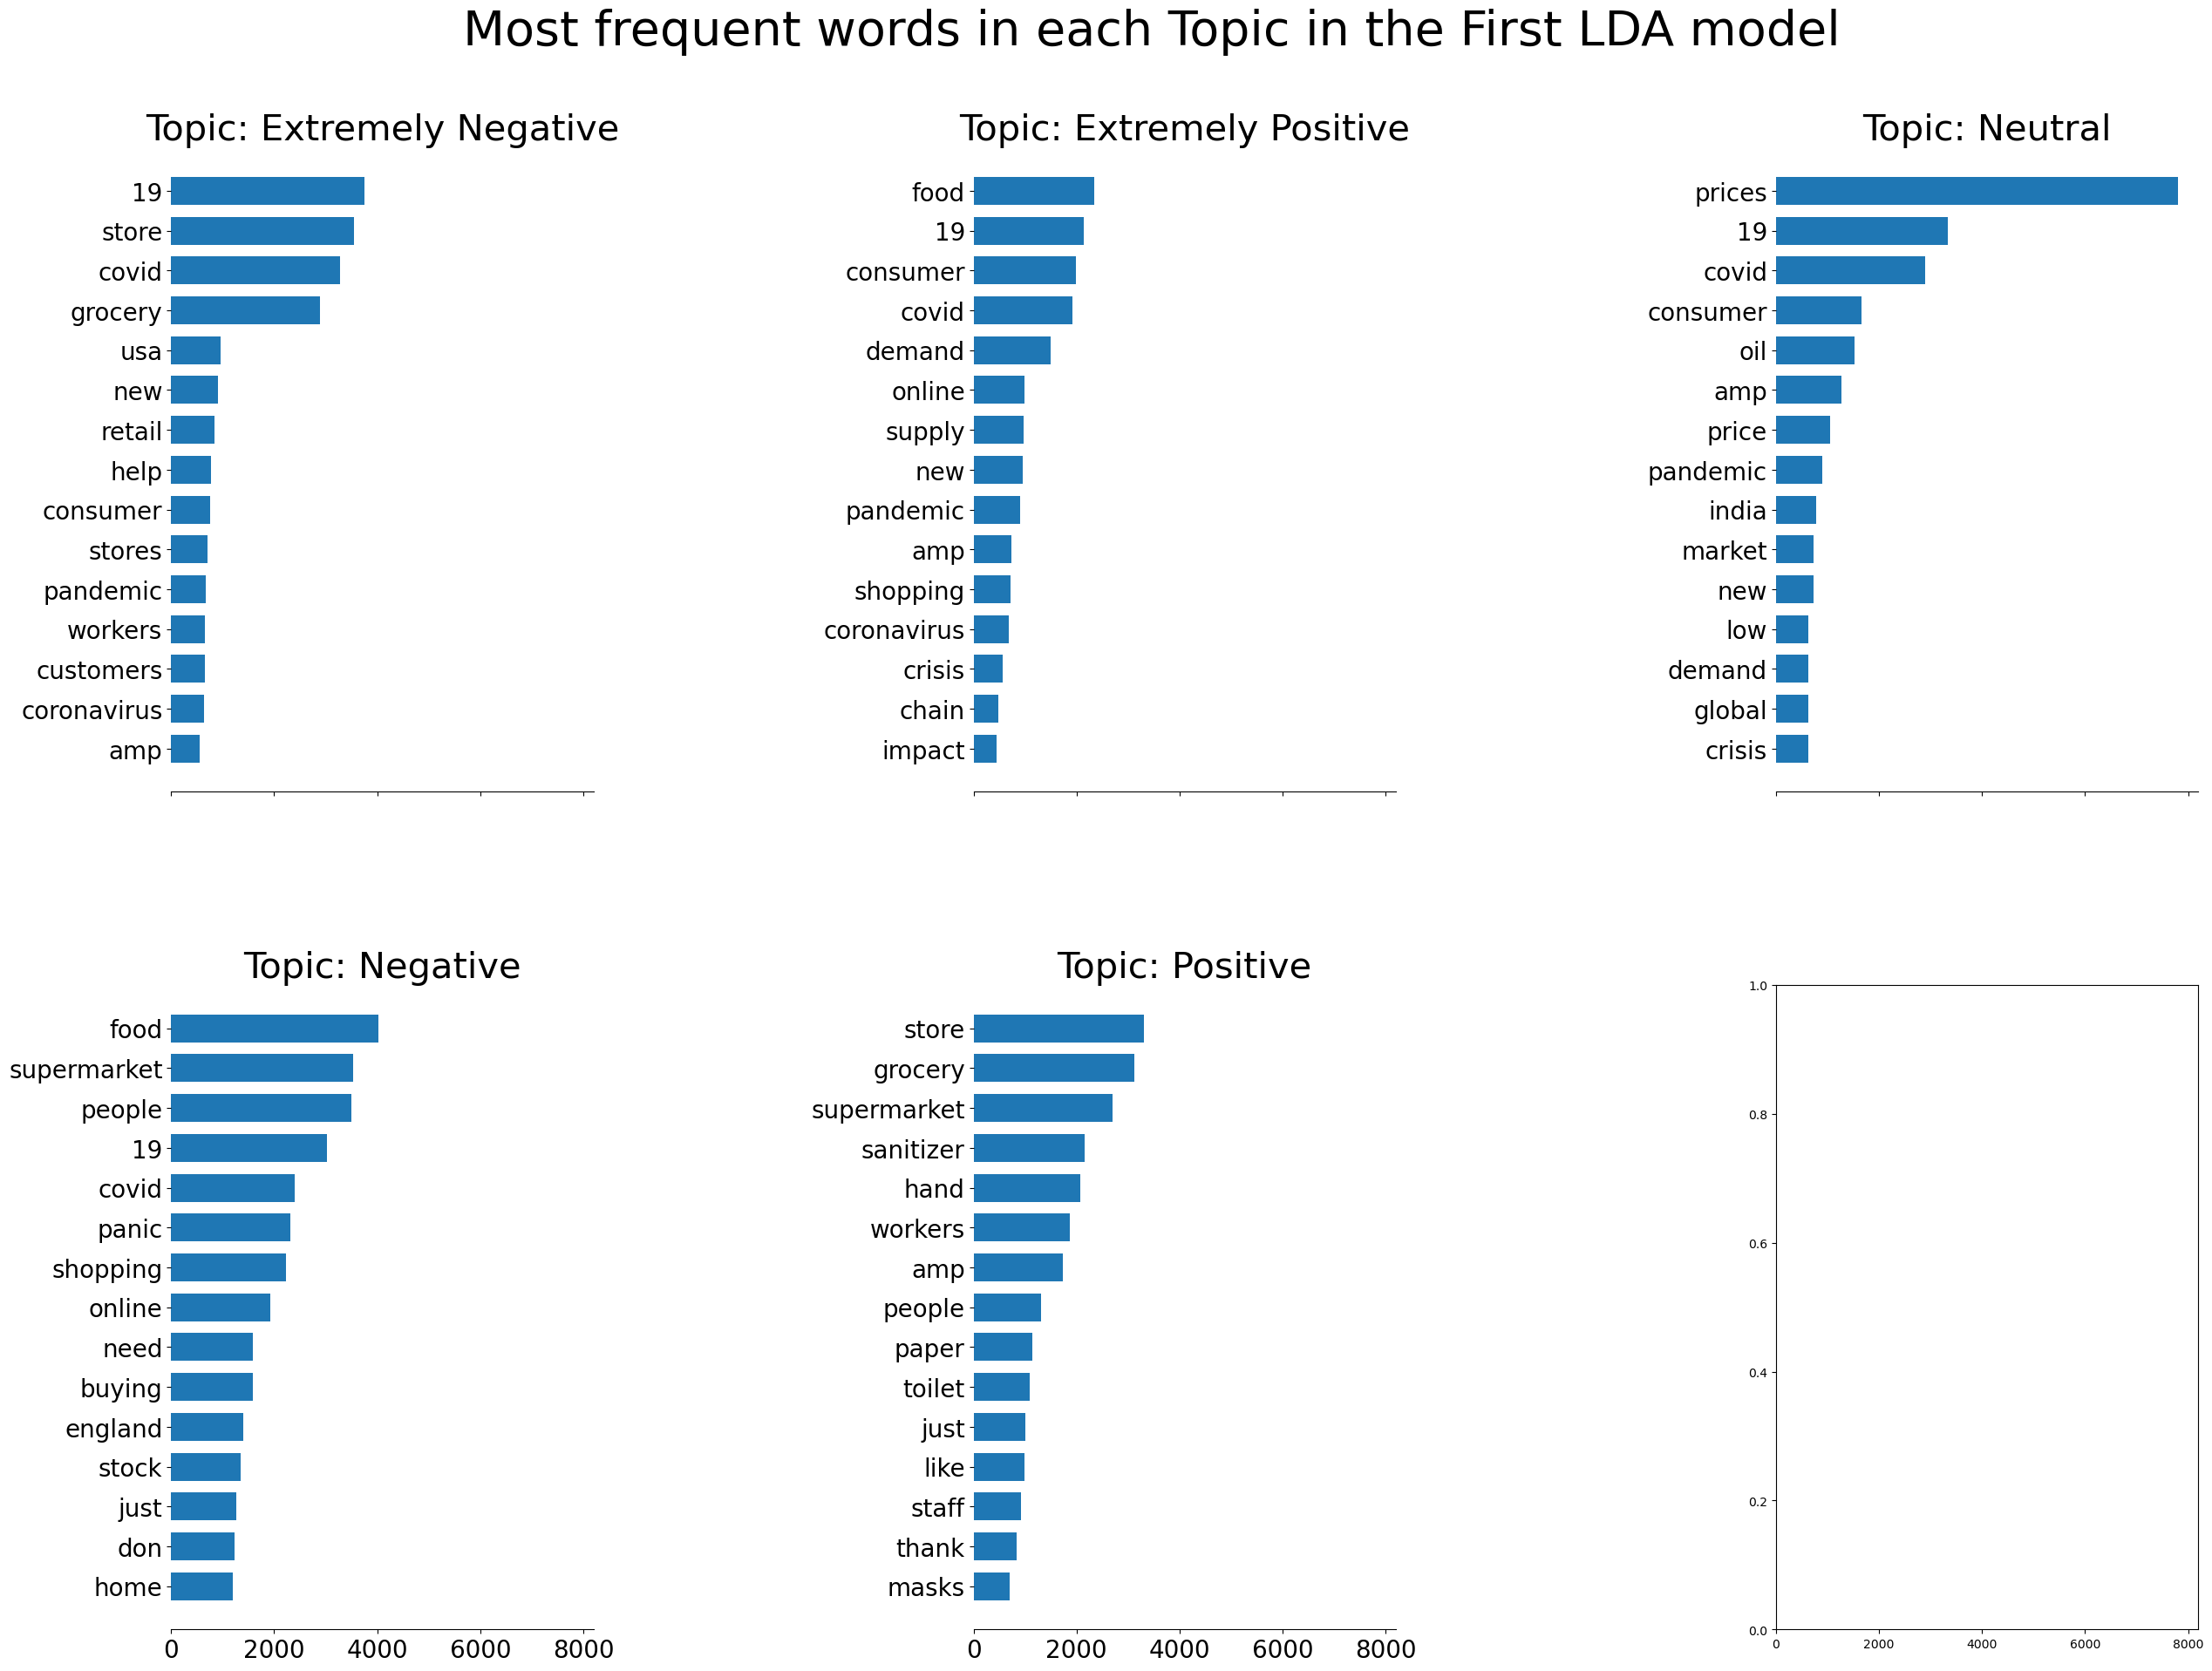

In [71]:
tf_feature_names = LDATFVectorizer.get_feature_names_out()
plottingTopWords(LDA, tf_feature_names, TopWords, 'Most frequent words in each Topic in the First LDA model')

#### 23- Generate the second topic model by setting five topics using LDA method and TfidfVectorizer.


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


#  word matrix using tfidf
tfidf_vectorizer2 = TfidfVectorizer(stop_words = 'english', # Remove the stop words
                                lowercase = True, # Convert the tokes to lower cases
                                token_pattern = r'\b[a-zA-Z0-9]{2,}\b', # spefic chars Regex
                                max_df = 0.9, 
                                min_df = 5)


document_word_matrix_tf_idf2 = tfidf_vectorizer2.fit_transform(corona_train['Tweet_texts_train'])

# LDA model and specify the number of topics
lda_tf_idf = LatentDirichletAllocation(n_components= 5, random_state= 100) # seed 100

#lda algorithm fits on the numerical matrix 
lda_tf_idf_model = lda_tf_idf.fit(document_word_matrix_tf_idf2)



#### 24- Plot the top 15 words for each topic for the second model above.


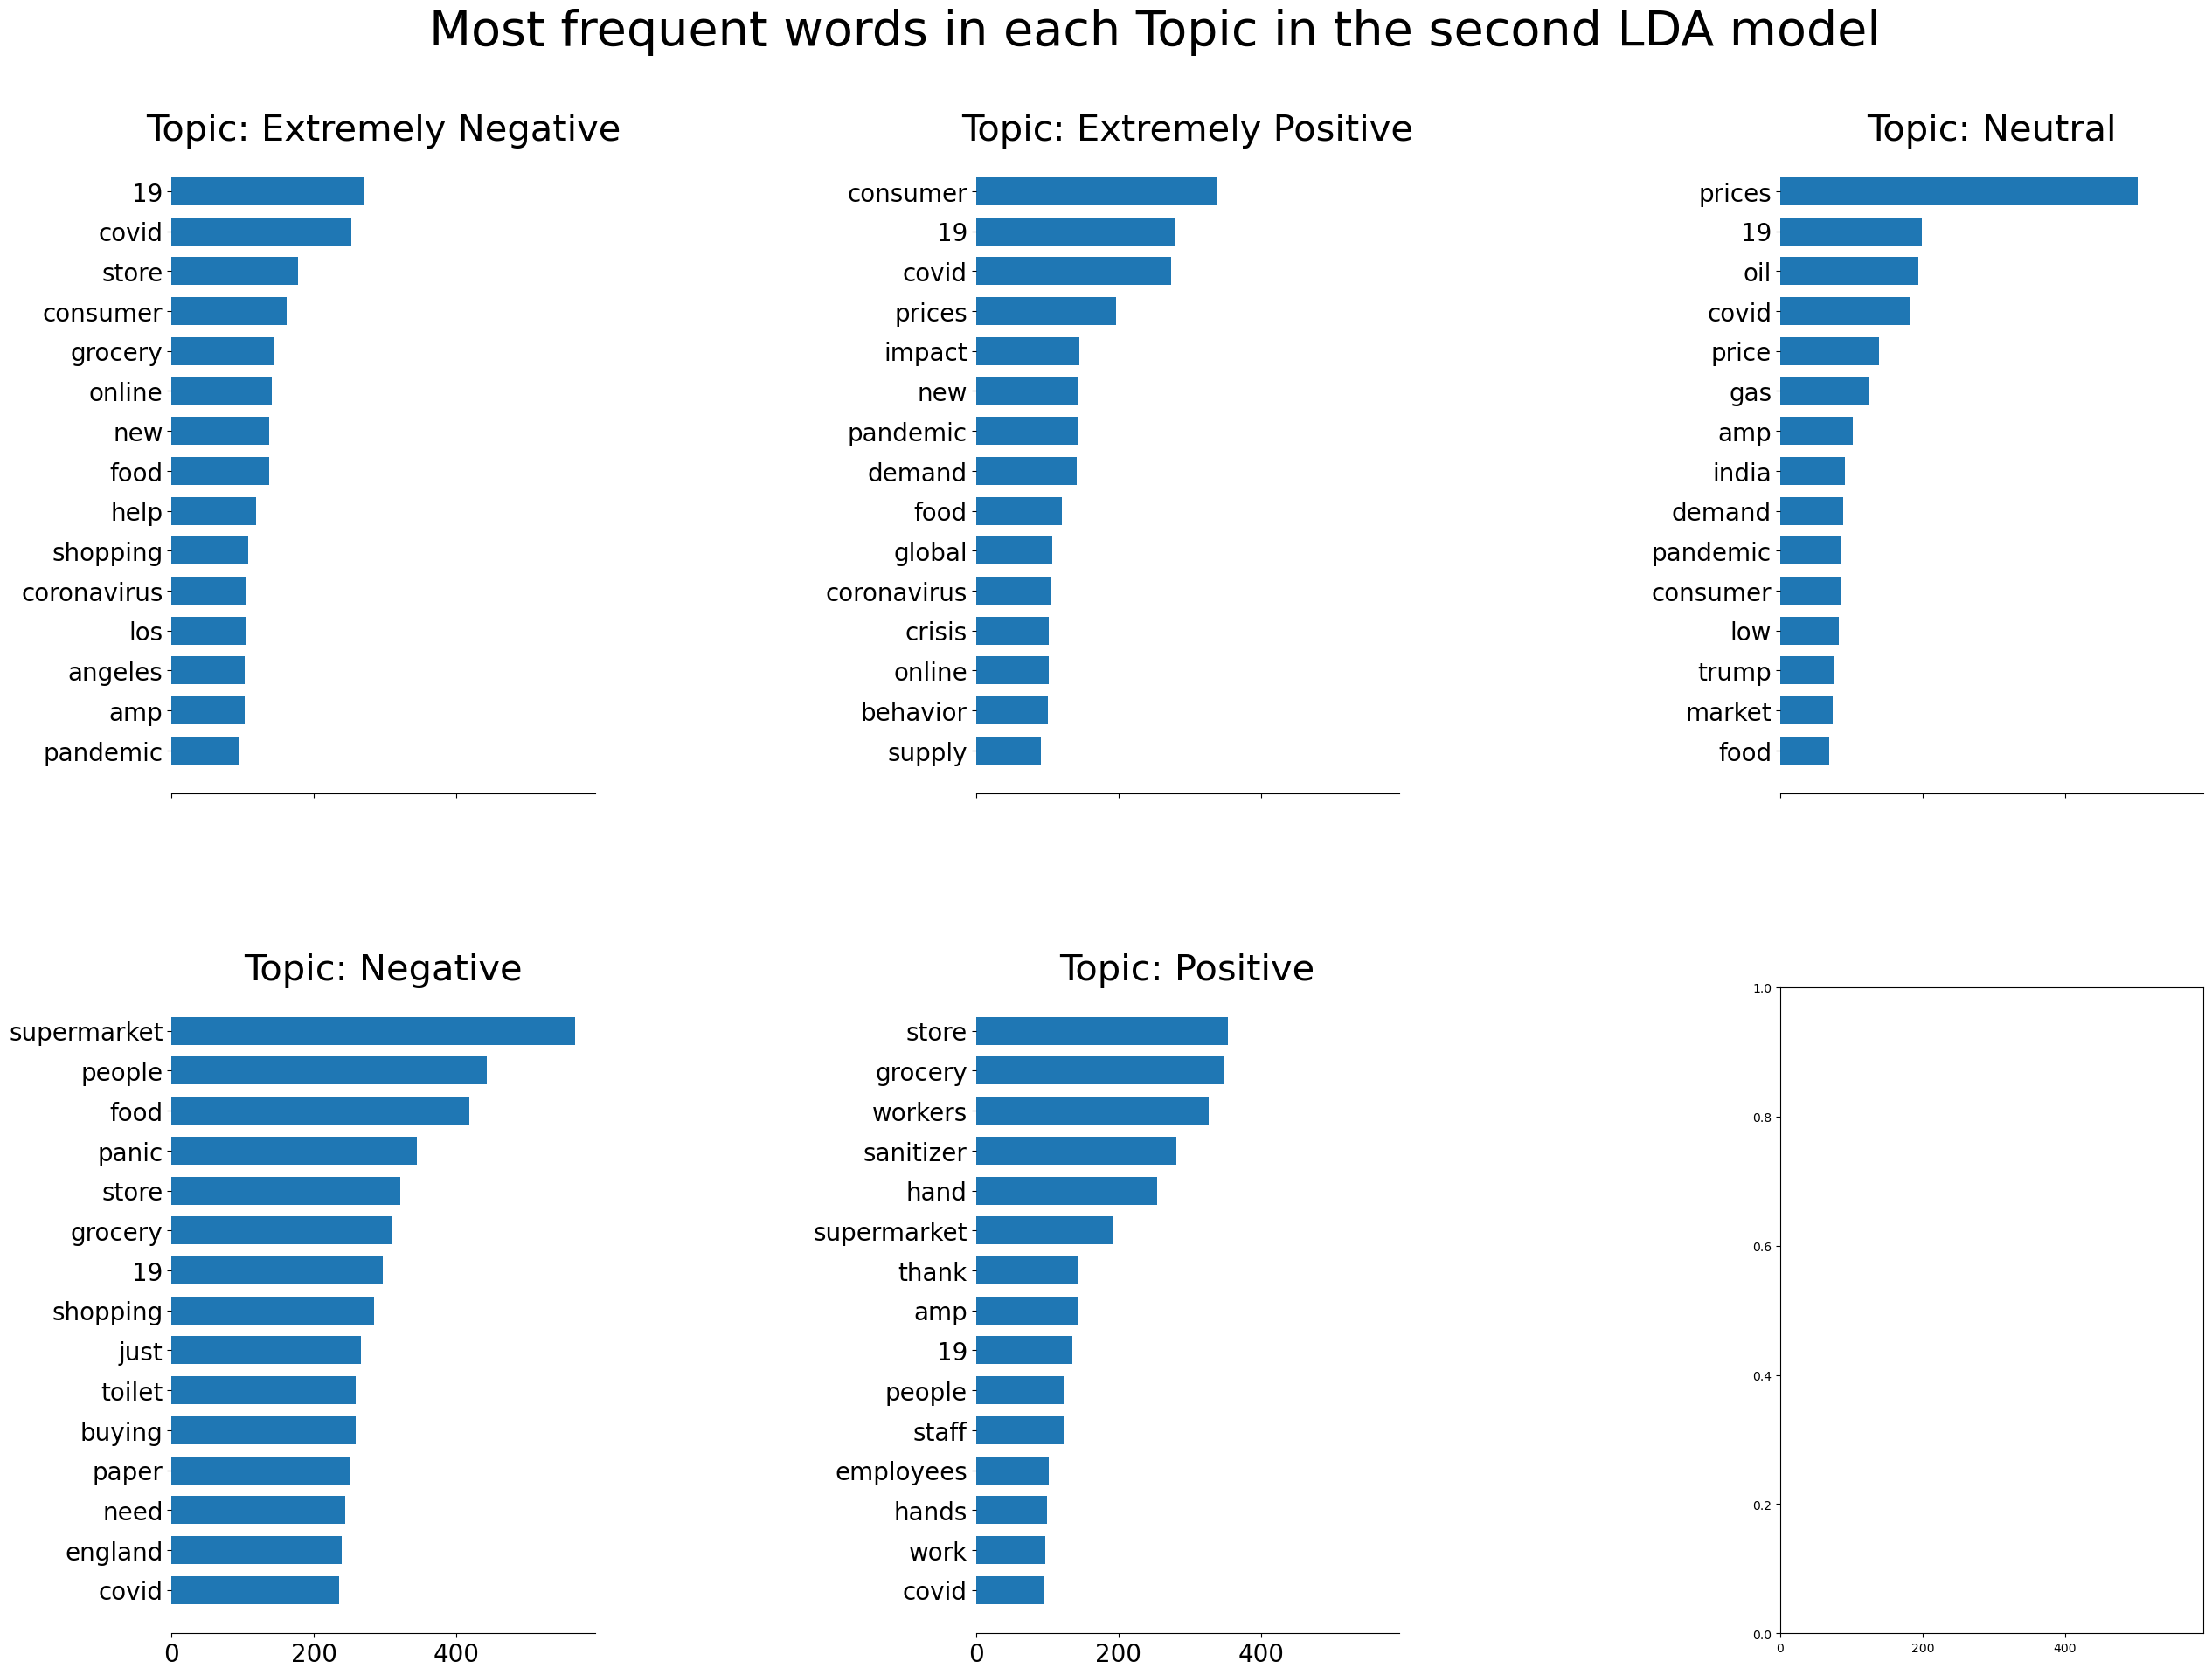

In [73]:
tf_feature_names2 = tfidf_vectorizer.get_feature_names_out()
plottingTopWords(lda_tf_idf_model, tf_feature_names2, TopWords, 'Most frequent words in each Topic in the second LDA model')

#### 25- Visualize the second topic model using the dimension reduction method.

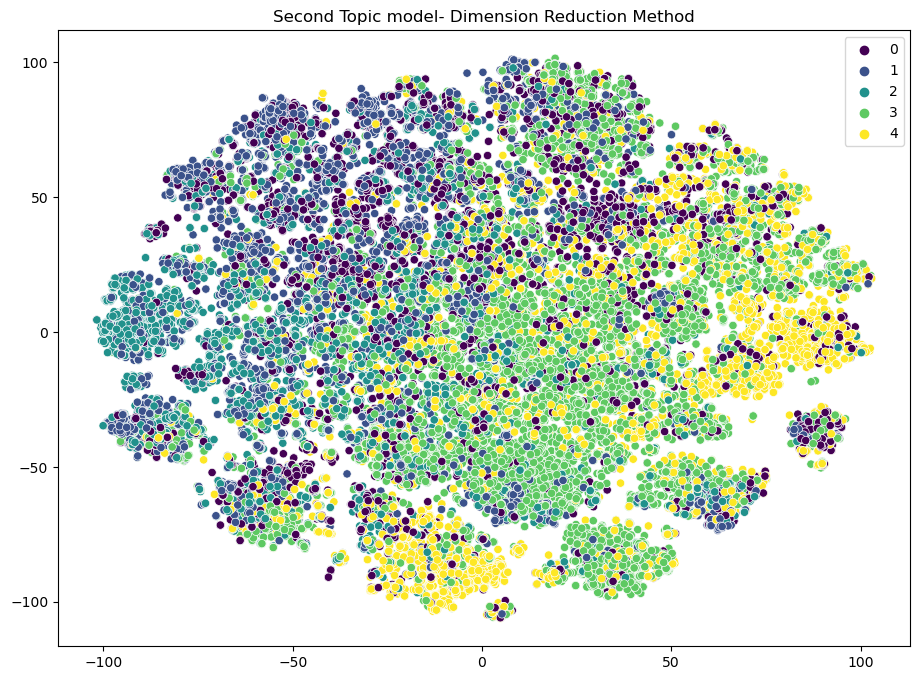

In [59]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE 
from sklearn.decomposition import TruncatedSVD 

createTSVD = TruncatedSVD(n_components=50, random_state=100)

# fit tfidef- tsvd
fit_tfidf = createTSVD.fit_transform(document_word_matrix_tf_idf2)

# tsne model
tsenModel = TSNE(n_components=2, random_state=100)

tsneLDA = tsenModel.fit_transform(fit_tfidf)

topicModel = lda_tf_idf.fit_transform(document_word_matrix_tf_idf2)

mainTopic = topicModel.argmax(axis=1)

# TSNE used to create model
plt.figure(figsize= (11, 8))
sns.scatterplot(x=tsneLDA[:, 0], y= tsneLDA[:, 1], hue= mainTopic, palette='viridis')
plt.title('Second Topic model- Dimension Reduction Method')
plt.show()